![cropped-SummerWorkshop_Header.png](../../resources/cropped-SummerWorkshop_Header.png)



<h1 align="center"> Neural Encoding </h1> 
<h2 align="center"> SWDB 2024 - Day 2 - Morning Session </h2> 
<h3 align="center"> Tuesday, August 20, 2024</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h2>Neural Encoding </h2>

Neural coding describes how neurons represent information about the world. Coding can be studied by asking whether external or internal events lead to changes in neural activity (<b>encoding</b>), or by asking whether different types of information can be read out from neural activity (<b>decoding</b>). In this workshop we will address the question of neural encoding, with a focus on single cell encoding models. 

Encoding of <b>sensory</b> information has been studied for decades by presenting animals with stimuli and observing how the activity of individual neurons changes. To study encoding of <b>motor</b> variables, researchers train animals to perform a behavior (or observe naturalistic behaviors) and correlate the animals' movement with changes in neural activity. Recent research has demonstrated that even sensory areas have representations of motor and behavioral variables, and vice versa. This is often called "multiplexed" coding. Furthermore, neural encoding can be influenced by <b>cognitive</b> processes such as learning, task engagement, and decision making. 

The exact form of neural activity changes is also a part of the study of neural coding. Neurons can represent information based on their average firing rates over a period of time, based on the precise spike times relative to some event, using bursts of spikes, or based on synchrony and timing relative to global population activity. In this workshop, we will consider <b>average firing rates</b> as they relate to information coding.

To learn more, check out this lecture Principles of Neural Coding by I. Memming Park: https://www.youtube.com/watch?v=DlFxUEdGlmQ
</div>


![neural_coding.png](../../resources/neural_coding.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> 

Today we will look at how neurons in the visual cortex encode sensory and behavioral information in mice performing a visually guided task.

The first workshop of the day will focus on how single cells encode information in their average activity patterns (the problem of X-->R in the schemtic above). In the afternoon, we will learn about how to decode information from populations of neurons (R-->X as shown above) and how variability and correlations influence decoding.

## Workshop Outline & Questions

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> What we will investigate today </h3>

<h4> Part 1 -  Visual Behavior Ophys Dataset</h4>

(1) What is the experimental design? What are the key considerations for the question of neural encoding?

(2) What recording modality was used? Why choose this modality? What are the pros & cons?

(3) How can we access the data we are interested in?


<h4> Part 2 -  Tuning for stimulus & behavior during task performance </h4>

(1) Can we find neurons in the mouse visual cortex that are selective for specific visual stimuli? How reliable are their responses?

(2) Do stimulus responses differ depending on the mouse's behavioral choice during the task? 

(3) Do neurons in the mouse visual cortex modulate their activity as a function of running speed? 


<h4> Part 3 -  Quantifying single cell coding with regression models </h4>

(1) How can linear regression be used to model neural coding? 

(2) How do you ensure that your model is valid and is not overfitting?

(3) How well can you predict neural activity based on stimulus information? Behavioral information? 

(4) Does the prediction improve when additional variables are included? (multiple linear regression)



## Part 1 - Visual Behavior Ophys Dataset

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Experimental Design </h3>

(1) What is the experimental design? What are the key considerations for the question of neural encoding?
</p>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Stimulus / behavior paradigm: A visual change detection task </h4>

<p> To understand how neurons encode sensory and behavioral variables, it is useful to examine neural activity under conditions where sensory input and behavioral outputs vary across conditions and show rich and interesting structure that can be used to disentangle their unique contributions to neural signals. 

In the <b>Visual Behavior Ophys</b> dataset, neural activity was recorded while mice performed a visual change detection task. Mice were presented with stimuli and asked to make choices about those stimuli, while their <b>running</b> and <b>licking</b> behavior were measured, along with <b>pupil diameter</b> as a proxy for the animals' internal state. 

During the change detection task, mice view a continuous stream of <b>natural scene images</b>, which are displayed for 250ms, followed by a 500ms gray screen period. The gray screen period adds a working memory component to the task. The job of the mouse is to decide - "is what i am seeing now the same or different than what i saw 500ms ago?". 

If the mouse correctly detects a change and reports their choice by licking a reward spout within 750ms of the change, the trial is considered a <b>hit</b>, and a water <b>reward</b> is delivered. If mice fail to lick after a change, the trial is a <b>miss</b>. If the mouse licks anytime outside of the reward window just after the change (called a false alarm or aborted trial), the trial resets and the mouse will have to wait longer until the next opportunity for a reward. 

Mice are free to run on a circular treadmill, however there is no relationship between the mouse's running and the flow of the task. Mice just like to run :)

</div>

![change_detection_task.png](../../resources/change_detection_task.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Opportunities to study encoding of stimulus & behavior variables </h4>

<p> During the task, mice are free to run on a circular disc. Many studies have shown that locomotion can influence sensory signals and some neurons can be tuned for running speed as well. 
Pupil diameter is also recorded, which can be used as a measure of overall behavioral state or arousal. When animals attend to a stimulus or are otherwise alert and active, the pupil dilates.
In contrast, during quiet or inattentive states, the pupil constricts. Neural coding is also influenced by arousal state, as measured by pupil diameter. 

Thus, in this dataset, we can ask about encoding of: 
* <b>Sensory stimuli</b> - via the images that are presented to the mouse
* <b> Behavioral choice</b>  - whether the mouse licks or not following a given stimulus presentation
* <b> Rewards</b>  - which are given depending on whether or not the mouse made a correct choice
* <b> Locomotion & arousal</b>  - via changes in animal running speed or pupil diameter

There may be additional dimensions of sensory or behavioral events that are of interest - can you think of any? 

Some other examples could be the number of exposures to a give image after a change, or the time since the last reward received by the mouse, or past trial outcomes, or perhaps a combination of running and pupil together is informative about cell activity.


</div>

![behavior_timeseries_color.png](../../resources/behavior_timeseries_color.png)

There are some interesting dynamics here - how might they influence neural activity?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Recording method </h3>

(2) What recording modality was used? Why choose this modality? What are the pros & cons?


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> 2-photon calcium imaging - pros & cons</h4>
<p>Today we will use the Allen Brain Observatory Visual Behavior Ophys dataset. 

"Ophys" stands for Optical Physiology, and typically refers to 2-photon calcium imaging of cellular activity (although there are other optical physiology methods!). You can learn more about this method in the *<b>DataBook</b>*

The critical thing to know for this workshop is that neural activity is measured as changes in the fluorescence of a genetically encoded calcium indicator, called GCaMP. Calcium influx occurs when neurons fire action potentials, thus the fluorescence of the calcium indicator is a proxy for neuronal spiking (however it is not a direct readout of neural spiking). 

Here are some additional considerations when choosing 2-photon calcium imaging as a recording modality:

Pros:
* Visualizing neurons in space
* Genetic targeting of specific neuron types
* Tracking neurons across multiple recording sessions

Cons:
* Slow acquisition rates relative to spike timing
* Limited to 500um depth, typically in cortex

</div>

Here is an example of what 2-photon calcium imaging looks like

<iframe width="560" height="315" src="https://www.youtube.com/embed/WGhMynyympg?si=panDVPhaaSTUAAy_" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Trangenic lines to label specific cell populations</h4>
<p>
In the <b>Visual Behavior Ophys</b> dataset, 3 different <b>transgenic mouse lines</b> were used to express GCaMP in either <b>excitatory neurons</b> (labeled by the Slc17a7-IRES2-Cre driver line), 
or in one of two types of <b>inhibitory neurons</b> - somatostatin (Sst) expressing neurons or vasoactive intestinal peptide (Vip) expressing neurons (Sst-IRES-Cre driver line and Vip-IRES-Cre driver lines, respectively). The reporter line driving GCaMP expression under the control of the Cre driver was either Ai93 or Ai148, both expressing GCaMP6f, which has fast kinetics. 

You can read more about transgenic mice in the <b>*DataBook*</b>

Sst and Vip inhibitory neurons are known to mutually inhibit each other and a shift in the balance between them can lead to disinhibition of excitatory neurons under certain conditions. Sst and Vip inhibitory neurons in the visual cortex, along with excitatory cells, are known to show modulation by locomotion, arousal, attention, and learning. 

Here is a useful review on how animal behavior and learning influence the coding of different cell types in the visual cortex: 
https://doi.org/10.1016/j.conb.2018.04.020

</div>

![cre_lines.png](../../resources/cre_lines.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

This dataset will allow us to ask not only about how neurons encode information, but also to ask which types of neurons encode which types of information. 
Combined with knowledge about anatomy and connectivity, this can help us understand how the brain computes information using circuits built up of unique cell types.

On day 3 of the workshop, you will learn about methods to map the morphology and synaptic connectivity of individual neurons, some of which are the same types of neurons recorded in this dataset. 

What kinds of questions can you address with 2-photon imaging alone? What kinds of questions could you address if you had both physiology and morphology? How can these different types of datasets inform each other?
 

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Multi-plane imaging across sensory & behavioral contexts</h4>

<p>
In in <b>Visual Behavior Ophys</b> dataset, a given population of neurons (i.e. a specific imaging plane) was measured across multiple sessions, and multiple imaging planes were recorded in each individual session. 

This experimental design allows analysis of changes in neural activity across days, under different <b>sensory and behavioral contexts</b>, and comparison of activity across different visual areas or cortical depths within a given session.

In some ophys sessions, mice perform the task with the image set they saw during training, which is highly <b>familiar</b>. 
In other sessions, mice perform the task with <b>novel</b> images they have never seen before. 

In addition to <b>active behavior</b> sessions where mice perform the task to earn rewards, there are also <b>passive viewing</b> sessions where the mice observe the stimulus in open loop, with no rewards delivered. In these passive sessions, mice are satiated and were given their daily water ration prior to the imaging session. 

</div>

![data_structure.png](../../resources/data_structure.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

These different features of the experiment means we need to keep track of a few things when doing analysis: 
<p>

* Which <b>session type</b> we are looking at (what image set was used? was it an active or passive session?)
  
* Which <b>brain area and cortical depth</b> the cells are from (i.e. which imaging plane it is within a session?)
  
* Which <b>genetically defined cell population</b> was imaged (i.e. what is the genotype of the mouse?)                                                                      

This information is provided as metadata by the <b>AllenSDK</b> toolkit, which you will learn how to use below.                                                                                                                                        

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

In the nomenclature of the <b>AllenSDK</b> we refer to each imaging plane within each session as an `ophys_experiment`.

The population of neurons in each imaging plane was tracked across multiple `ophys_sessions`, recorded on different days.

The collection of recording sessions belonging to a given imaging plane is called an `ophys_container`.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

For today's workshop, we will analyze an experiment from a transgenic mouse expressing GCaMP6f in 

<b>Sst neurons</b> in the 

<b>primary visual cortex</b> during an 

<b>active behavior</b> session with 

<b>familiar images</b>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Data access </h3>

(3) How can we access the data we are interested in?


In [1]:
# We need to import these modules to get started
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn makes pretty plots & sets font sizes nicely
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

# magic functions for jupyter notebook plotting
%load_ext autoreload
%autoreload 2
%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4>Using the AllenSDK toolkit</h4>

<p>
To identify experiments of interest based on the features of this dataset as described above, such as what cell populations were imaged, what types of sessions there were, etc., we need to access the metadata tables in the `VisualBehaviorOphysProjectCache` using the `AllenSDK` toolkit.

The `VisualBehaviorOphysProjectCache` class is responsible for downloading any requested data or metadata as needed and storing it in well known locations.  For this workshop, all of the data has been preloaded into data assets on CodeOcean - These data are big, and this will save us a lot of bandwidth and time.

</div>


In [2]:
# confirm that you are currently using the newest version of SDK (2.16.2)
import allensdk
allensdk.__version__

'2.16.2'

The code below shows you how to use the `VisualBehaviorOphysProjectCache` class to load metadata tables & explore the features of the dataset.

In [3]:
# This is the directory where files will be saved
# If using Code Ocean, this should link to the data directory, where the files will already be available
output_dir = r'/scratch/'
#output_dir = r'/Users/marinag/Documents/Data/visual_behavior_ophys_cache_dir'

In [4]:
# import behavior projet cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=output_dir)

/opt/conda/lib/python3.8/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


The cache contains methods that allow you to explore the types of recording sessions that exist in the dataset, and to load the data for individual experiments.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h3> Metadata tables </h3>


#### Load all cache tables

In [5]:
# There are 4 metadata tables associated with the Visual Behavior Ophys dataset
behavior_session_table = cache.get_behavior_session_table()  
ophys_session_table = cache.get_ophys_session_table()   
ophys_experiment_table = cache.get_ophys_experiment_table()    
ophys_cells_table = cache.get_ophys_cells_table()                         


#print number of items in each table 
print('Number of behavior sessions = {}'.format(len(behavior_session_table)))
print('Number of ophys sessions = {}'.format(len(ophys_session_table)))
print('Number of ophys experiments = {}'.format(len(ophys_experiment_table)))
print('Number of unique cells = {}'.format(len(ophys_cells_table.cell_specimen_id.unique())))

Number of behavior sessions = 4782
Number of ophys sessions = 703
Number of ophys experiments = 1936
Number of unique cells = 50476


What is the difference between the `ophys_session_table` and the `ophys_experiment_table`? 

In [6]:
ophys_experiment_table.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


In [7]:
ophys_session_table.head()

,behavior_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,behavior_type,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,num_depths_per_area,ophys_experiment_id,num_targeted_structures
ophys_session_id,,,,,,,,,,,,,,,,,,,,,
951410079,951520319,"[1018028339, 1018028342, 1018028345, 101802835...",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,...,active_behavior,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,4,"[951980471, 951980473, 951980475, 951980479, 9...",2
952430817,952554548,"[1018028339, 1018028345, 1018028354, 1018028357]",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,209,...,passive_viewing,Familiar,0,66,1,2019-09-23 08:45:38.490000+00:00,MESO.1,4,"[953659743, 953659745, 953659749, 953659752]",2
954954402,953982960,"[1018028339, 1018028342, 1018028345, 101802835...",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,210,...,active_behavior,Familiar,0,67,2,2019-09-24 09:01:31.582000+00:00,MESO.1,4,"[958527464, 958527471, 958527474, 958527479, 9...",2
955775716,956010809,"[1018028339, 1018028342, 1018028345]",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,212,...,active_behavior,Familiar,1,68,3,2019-09-26 09:22:21.772000+00:00,MESO.1,4,"[956941841, 956941844, 956941846]",2
957020350,957032492,"[1018028339, 1018028342, 1018028345, 101802835...",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,213,...,active_behavior,Novel 1,0,0,4,2019-09-27 08:58:37.005000+00:00,MESO.1,4,"[957759562, 957759564, 957759566, 957759570, 9...",2


The `ophys_experiment_table` contains one row for each imaging plane recorded in each session for all mice in the dataset. 

The `ophys_session_table` contains one row for each ophys session, which can contain one or more imaging planes. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<p>
The metadata tables include a number of key details for understanding the dataset, such as - where the recordings were made, what type of cells were labeled, and what stimulus was shown in a given session. 

The *DataBook* describes all the columns of the metadata tables. We will explore a few of the most important ones here. 


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

First, let's narrow down our search and specifically look at the sessions for the <b>VisualBehaviorMultiscope</b> cohort. 

Filter the `ophys_session_table` to limit to the <b>VisualBehaviorMultiscope</b> `project_code` and assign the results to a new variable called `multiscope_sessions`.

How many mice are in this cohort? What mouse genotypes are available? (Hint: get the unique values of the `full_genotype` column)

In [8]:
# Limit to a specific cohort / project code and check how many mice there are
project_code = 'VisualBehaviorMultiscope'
multiscope_sessions = ophys_session_table[ophys_session_table.project_code==project_code]
print('There are', len(multiscope_sessions.mouse_id.unique()), 'mice in the', project_code, 'project_code')

There are 24 mice in the VisualBehaviorMultiscope project_code


In [9]:
# Check what genotypes are available for this cohort
print('Available genotypes:')
print(multiscope_sessions.full_genotype.unique())

Available genotypes:
['Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'
 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt'
 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h4>What is a genotype?</h4>
    
Typically, several transgenic lines of mice are bred together to create cell type specific expression of a gene of interest by combining a `driver line` (also called a `cre_line`) expressing Cre recombinase under the control of a specific gene of interest, and a `reporter line` that expresses some protein (such as GCaMP) under the control of Cre recombinase. This allows scientists to mix and match a variety of drivers & reporters to do different types of experiments. 

The `full_genotype`: describes the strategy that was used to label a given cell population with GCaMP.

The `cre_line`: is the first element of the `full_genotype` and determines which cell population is being targeted. In this dataset, it can be Slc17a7 for excitatory neurons, or Sst or Vip for different types of inhibitory neurons.

The `reporter_line`: is the final element of the `full_genotype` and determines what kind of reporter gene is expressed. In this dataset GCaMP6f is used.

You can learn more about transgenic mice and associated techniques in the <b>*DataBook*</b>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Let's look at an experiment where Sst inhibitory neurons were recorded. 

What are the unique values of the `mouse_id` column for mice with `cre_line` = <b>Sst-IRES-Cre</b> in the `multiscope_sessions` table we just made?

Pick the mouse with the largest value of `mouse_id` and assign it to a new variable called `special_mouse_id`.

What are the available values of the `session_type` column for this mouse?

Note the data type of the `mouse_id` column.

In [10]:
# Filter by cre_line to get just the Sst mice, then print out the unique values of mouse_id, sorted in ascending order
cre_line = 'Sst-IRES-Cre'
sst_mice = multiscope_sessions[(multiscope_sessions.cre_line==cre_line)].mouse_id.unique()
print(np.sort(sst_mice))

['440631' '448366' '457841' '482853' '544965' '546605']


In [11]:
# This is our special mouse
special_mouse_id = '546605'

In [12]:
# Get all session types for special mouse
ophys_session_table[ophys_session_table.mouse_id==special_mouse_id].session_type.unique()

array(['OPHYS_1_images_A', 'OPHYS_2_images_A_passive', 'OPHYS_4_images_B',
       'OPHYS_5_images_B_passive', 'OPHYS_6_images_B'], dtype=object)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h4>What session type to choose?</h4>

The `session_type` column is a short hand description that conveys a several pieces of information about what the mouse experienced during a given session. Some of these pieces of information also have their own unique columns that you can search by. The `session_type` includes: 
<p>

* Whether the session was during <b>TRAINING</b> or <b>OPHYS</b> (the first element of the `session_type`)
* Which `image_set` was shown during that session (the second element of the `session_type`)
* The `behavior_type`, whether the session was <b>active behavior</b> or <b>passive viewing</b> (if the session type doesnt say `passive` at the end, that means it was an active behavior session)

<p>
Other columns that provide valuable information about what happened during a session include: 
<p>

`experience_level`: whether the session used <b>Familiar</b> or <b>Novel</b> images, and whether it was the first novel day (`Novel 1`) or a subsequent novel day `Novel >1`

`prior_exposures_to_image_set`: how many prior sessions the mouse has experienced with the image set being shown during the current session (should always be zero for `Novel 1` sessions)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the `ophys_session_id` for `session_type` = `OPHYS_1_images_A` for our special mouse. Save it to a variable called `familiar_session_id`.

What are the values of `experience_level` and `prior_exposures_to_image_set` for this session?

In [22]:
# Get the session metadata for special mouse with the session type listed above
sessions = ophys_session_table[(ophys_session_table.mouse_id==special_mouse_id) & 
                                (ophys_session_table.session_type=='OPHYS_1_images_A')]
sessions.head()

,behavior_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,behavior_type,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,num_depths_per_area,ophys_experiment_id,num_targeted_structures
ophys_session_id,,,,,,,,,,,,,,,,,,,,,
1080522184,1080558783,"[1079027842, 1079027847, 1079027857, 1079027861]",546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,181,...,active_behavior,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,4,"[1080945462, 1080945465, 1080945468, 1080945471]",2


In [23]:
familiar_session_id = sessions.index.values[0]

In [24]:
# What is the experience_level and prior exposures value for this session?
sessions[['session_type', 'experience_level', 'prior_exposures_to_image_set']]

,session_type,experience_level,prior_exposures_to_image_set
ophys_session_id,,,
1080522184,OPHYS_1_images_A,Familiar,41


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h4>Where was imaging performed for this session?</h4>

Relevant metadata columns include: 

`imaging_depth`: Because Ca2+ imaging is an optical technique, recordings must be targeted to a specific focal depth of the microscope, corresponding to how deep in the tissue the images were collected. 
The values in the `imaging_depth` column indicate the distance from the cortical surface for each imaging plane that was recorded. 

`targeted_structure`: This is the brain area where the recording was made. 
In Allen Brain Observatory Ophys experiments, specific visual areas are targeted using Intrinsic Signal Imaging (ISI) to identify the boundaries of each visual area based on their reinotopic maps. You can learn more about this method in the <b>DataBook</b>.

As we saw previously, the `ophys_experiment_table` contains metadata for each individual image plane that was recorded in each session. Accordingly, information about which areas and depths were recorded can be found in the `ophys_experiment_table`, but not in the `ophys_session_table`. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the `ophys_experiment_table` to find all the imaging planes recorded in the `familiar_session_id` from our special mouse.

What `targeted_structures` were imaged? What are the available values of `imaging_depth`? What `equipment_name` was used to record this session?

In [25]:
# Get all recordings for session type OPHYS_1_images_A for our special mouse using the ophys_session_id we saved above
experiments = ophys_experiment_table[ophys_experiment_table.ophys_session_id==familiar_session_id]
experiments.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
1080945462,1080558783,1080522184,1079027842,546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,2021-08-12,1056093655,505
1080945465,1080558783,1080522184,1079027847,546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,2021-08-12,1056093655,506
1080945468,1080558783,1080522184,1079027857,546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,2021-08-12,1056093655,507
1080945471,1080558783,1080522184,1079027861,546605,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Familiar,0,41,0,2021-02-02 09:56:33.243000+00:00,MESO.1,2021-08-12,1056093655,508


In [26]:
# Print out the targeted structures and the imaging depths
print(experiments.targeted_structure.unique())
print(experiments.imaging_depth.unique())

['VISp' 'VISl']
[225 300 213]


In [27]:
# We can also look at both of these pieces of information at once by limiting the table just to those columns (plus a few others that might be interesting)
experiments[['targeted_structure', 'imaging_depth', 'session_type', 'experience_level', 'equipment_name']]

,targeted_structure,imaging_depth,session_type,experience_level,equipment_name
ophys_experiment_id,,,,,
1080945462,VISp,225,OPHYS_1_images_A,Familiar,MESO.1
1080945465,VISp,300,OPHYS_1_images_A,Familiar,MESO.1
1080945468,VISl,213,OPHYS_1_images_A,Familiar,MESO.1
1080945471,VISl,300,OPHYS_1_images_A,Familiar,MESO.1


In this session, recordings were made in VISp and VISl, at multiple cortical depths. However we only see 4 imaging planes here (each represented by a unique `ophys_experiment_id`) - shouldnt we expect 8 imaging planes per session for multi-plane imaging experiments? 

While it is true that 8 imaging planes are recorded in each multi-plane imaging session (acquired using the `MESO.1` or `MESO.2` microscopes), there are strict quality control (QC) criteria applied to each imaging plane. 

Some of the 8 planes can fail QC while others pass. Examples of QC criteria include: how much brain motion there was for a given plane or whether the signal to noise was too low to detect cells.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the `ophys_experiment_id` for the recording in `VISp` at `225`um depth, and save it to a variable called `ophys_experiment_id`

In [28]:
targeted_structure = 'VISp'
imaging_depth = 225
ophys_experiment_id = experiments[(experiments.targeted_structure==targeted_structure) & 
                                    (experiments.imaging_depth==imaging_depth)].index.values[0]
print(ophys_experiment_id)

1080945462


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h3> Physiology data </h3>

To load the data for a single imaging plane recorded in a given session, we can use the `get_behavior_ophys_experiment` method of the `VisualBehaviorOphysProjectCache` class that we instantiated previously as `cache`. 

This method returns a python object that contains all data and metadata for a given recording as attributes, along with some useful functions. We typically name this python object simply `dataset`.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the `ophys_experiment_id` we saved above as the input to the `get_behavior_ophys_experiment` method of the cache. 

Save the output to a variable called `dataset`. This is a python object that contains all the data for this imaging plane. 

Examine the `metadata` attribute.


In [29]:
# Load the dataset for the ophys_experiment_id we selected 
dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id)

/opt/conda/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


In [30]:
# Look at the metadata attribute
dataset.metadata

{'equipment_name': 'MESO.1',
 'sex': 'M',
 'age_in_days': 181,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2021, 2, 2, 9, 56, 33, 243000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('75ef16e0-b427-4451-b872-cdcd74553968'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '546605',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 1080558783,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1079027842,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 225,
 'targeted_imaging_depth': 228,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 1080945462,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 1080522184,
 'targeted_structure': 'VISp'}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h4>What physiology data is provided?</h4>
<p>

`dff_traces`: dataframe containing normalized fluorescence traces for each cell. dF/F or dFF stands for 'delta fluorescence over baseline fluorescence', i.e. the change in fluorescence relative to each cell's baseline signal. 

`events`: dataframe containing calcium events detected from fluorescence signals. events are detected based on the rapid rise in calcium, typically associated with bursts of spikes. Events have a time and a magnitude, roughly equivalent to the spike rate of a neuron.

`ophys_timestamps`: time, in seconds, of each imaging frame of the 2-photon movie. The indices of `dff_traces` and `events` correspond to the times in the `ophys_timestamps` array. Note that the frame rate of the recordings can vary, with 30Hz being typical for single-plane imaging sessions, and 11Hz typical for multi-plane imaging.

`max_projection`: array of maximum intensity projection image of the 2-photon movie. Allows visualization of pixels with large changes in fluorescence, corresponding to active neurons.  

`average_projection`: array of average intensity projection image of the 2-photon movie. Allows visualization of average fluorescence across the 2-photon field of view. 

`roi_masks`: dataframe containing regions of interest corresponding to neuron cell bodies, segmented from the 2-photon movies. Each cell trace comes from one of the roi_masks.

`segmentation_mask_image`: array containing all segmented ROIs.

`cell_specimen_table`: dataframe containing cell ROI information

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Plot the `max_projection` and `segmentation_mask_image` this imaging plane. How many ROIs are there?

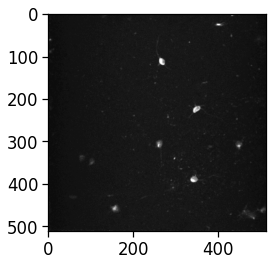

In [31]:
plt.imshow(dataset.max_projection, cmap='gray')

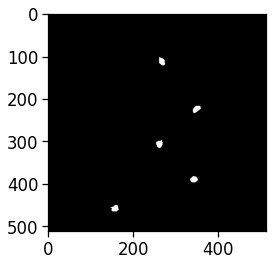

In [32]:
plt.imshow(dataset.segmentation_mask_image, cmap='gray')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `dff_traces` and `events` attributes. How are they formatted?


In [33]:
dataset.dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1120091374,1115349817,"[0.7160711781887898, 0.6762362443504489, 0.388..."
1120091421,1115349824,"[1.8867693532204104, 1.060213996273943, 0.6995..."
1120091574,1115349846,"[1.2439478189398283, 1.1846218118269713, 0.312..."
1120091628,1115349850,"[0.4401555247935194, 0.7162578934052323, 0.430..."
1120091659,1115349854,"[0.3687507608006909, 0.38771313157157544, 0.41..."


In [34]:
dataset.events.head()

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1120091374,1115349817,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1492,0.121036
1120091421,1115349824,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.5322,0.228839
1120091574,1115349846,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.3728,0.191850
1120091628,1115349850,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2187,0.146503
1120091659,1115349854,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2117,0.144065


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

The ```events``` table is similar to ```dff_traces``` but the output provides traces of deconvolved events. Events are computed on spatially unmixed dff traces for each cell as described in [Giovannucci et al. 2019](https://pubmed.ncbi.nlm.nih.gov/30652683/). 

The magnitude of events approximates the firing rate of neurons with the resolusion of about 200 ms. The biggest advantage of using events over dff traces is they exclude prolonged Ca transients that may conteminate neural responses to subsequent stimuli. You can also use ```filtered_events``` which are events convolved with a filter created using ```stats.halfnorm``` method. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Pick one `cell_specimen_id` and plot dF/F and events for that cell, using `ophys_timestamps` for the y-axis values to show the time in seconds. 


In [35]:
# Get cell_specimen_id from the cell_specimen_table. Can also get from either the dff_traces or events
cell_specimen_ids = dataset.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_id = cell_specimen_ids[1] # pick the second cell (index = 1 because python uses zero indexing)
print('Cell specimen id = {}'.format(cell_specimen_id)) # print the cell ID

Cell specimen id = 1120091421


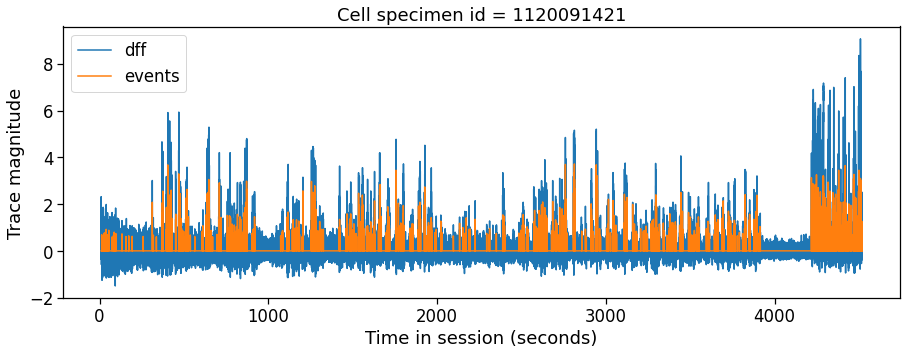

In [36]:
# Plot dff and events traces overlaid from the cell selected above
fig, ax = plt.subplots(1, 1, figsize = (15,5))
ax.plot(dataset.ophys_timestamps, dataset.dff_traces.loc[cell_specimen_id]['dff'], label='dff')
ax.plot(dataset.ophys_timestamps, dataset.events.loc[cell_specimen_id]['events'], label='events')
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Trace magnitude')
ax.set_title('Cell specimen id = {}'.format(cell_specimen_id))
ax.legend()


We can see that as expected, events trace is much cleaner than dff and it generally follows big calcium transients really well.

This cell is particularly active towards the end of the session - whats up with that? 

If you've checked out the <b>*DataBook*</b> description of the Visual Behavior Ophys dataset, you would have seen that each Visual Behavior Ophys experiment has 10 repeats of a 30 second movie clip at the end of each session. 
It would be interesting to see how reliable the cell's response is across repeats of the movie. 

You can also learn about what stimuli are presented and when using the `stimulus_presentations` table.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h3> Stimulus presentations </h3>

Each ophys session is broken up into several <b>stimulus blocks</b>.

First, a 5 minute gray screen period occurs during which there are no visual stimuli. This is helpful to determine cells' baseline level of activity. There is another 5 minute gray screen period at the end of the session, followed by 10 repeats of a 30 second movie clip. 

The bulk of each ophys session is change detection task performance, which lasts for 60 minutes. During the change detection task, 8 different images are shown, with each image being repeatedly presented for 250ms, followed by a 500ms gray screen period. The task of the mouse is to ask - "is what i am seeing now the same or different than what i saw 500ms ago?". 

If the mouse licks the reward spout during the 750ms reward window following an image change, they will receive a water reward. If the mouse licks anytime outside the reward window, the onset of the next trial, and thus the next image change and opportunity for reward, will be delayed. 

While there is a trial structure to the task, it is invisible to the mouse. The stimuli appear as a continuous stream with no interruption or trial start cue. Image change times are drawn from an exponential distribution between 4 and 12 flashes from the time of the mouse's last lick. 


Insert image of stim blocks

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `stimulus_presentations` attribute. What are the columns? 

What are the values of the `stimulus_block_name` column?

In [37]:
# What does the stimulus_presentations table look like? 
dataset.stimulus_presentations.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,active,is_sham_change
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,0,initial_gray_screen_5min,-99,NaN,-99,309.366891,0.000000,309.366891,0,17985,False,<NA>,<NA>,-99,0,-99,spontaneous,False,False
1,1,change_detection_behavior,0,im065,-99,0.250210,309.366891,309.617101,17985,18000,False,False,False,-99,1,0,Natural_Images_Lum_Matched_set_training_2017,True,False
2,1,change_detection_behavior,0,im065,-99,0.250220,310.117501,310.367721,18030,18045,False,False,False,-99,2,0,Natural_Images_Lum_Matched_set_training_2017,True,False
3,1,change_detection_behavior,0,im065,-99,0.250190,310.868141,311.118331,18075,18090,False,False,False,-99,3,0,Natural_Images_Lum_Matched_set_training_2017,True,False
4,1,change_detection_behavior,0,im065,-99,0.250200,311.618751,311.868951,18120,18135,False,False,False,-99,4,0,Natural_Images_Lum_Matched_set_training_2017,True,False


In [38]:
# What are the stimulus blocks?
dataset.stimulus_presentations.stimulus_block_name.unique()

array(['initial_gray_screen_5min', 'change_detection_behavior',
       'post_behavior_gray_screen_5min', 'natural_movie_one'],
      dtype=object)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Assign the table to a variable called `stimulus_presentations`, so that we dont have to retrieve it from the dataset object every time we want to use it.

Select the `change_detection_behavior` block and look at the unique values of the `image_name` column for that block.

In [39]:
# Assign the table to a new variable
stimulus_presentations = dataset.stimulus_presentations.copy()

In [40]:
# Limit to change detection behavior block
stimulus_presentations = stimulus_presentations[stimulus_presentations.stimulus_block_name=='change_detection_behavior']
stimulus_presentations.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,active,is_sham_change
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
1,1,change_detection_behavior,0,im065,-99,0.25021,309.366891,309.617101,17985,18000,False,False,False,-99,1,0,Natural_Images_Lum_Matched_set_training_2017,True,False
2,1,change_detection_behavior,0,im065,-99,0.25022,310.117501,310.367721,18030,18045,False,False,False,-99,2,0,Natural_Images_Lum_Matched_set_training_2017,True,False
3,1,change_detection_behavior,0,im065,-99,0.25019,310.868141,311.118331,18075,18090,False,False,False,-99,3,0,Natural_Images_Lum_Matched_set_training_2017,True,False
4,1,change_detection_behavior,0,im065,-99,0.25020,311.618751,311.868951,18120,18135,False,False,False,-99,4,0,Natural_Images_Lum_Matched_set_training_2017,True,False
5,1,change_detection_behavior,0,im065,-99,0.25022,312.369321,312.619541,18165,18180,False,False,False,-99,5,0,Natural_Images_Lum_Matched_set_training_2017,True,False


This table provides helpful information like image name, start, duration and stop of image presentation, and whether the image was omitted. 

In [41]:
# What are the image names?
stimulus_presentations.image_name.unique()

array(['im065', 'im077', 'im063', 'im062', 'im061', 'im066', 'omitted',
       'im069', 'im085'], dtype=object)

If you are curious what these images look like, you can check the <b>*DataBook*</b> to learn how to visualize them using the `stimulus_templates` attribute

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h4> Image changes and image omissions </h4>

You may have noticed that one of the values of `image_name` is "omitted". 
That is because some image presentations are randomly omitted during ophys sessions (but never during training).
This allows neural signals associated with the absence of an expected stimulus to be analyzed. 

The `omitted` column of the `stimulus_presentations` table also provides a useful Boolean value to filter by omissions. 

Another useful column is the `is_change` column, which is another Boolean value. 
This can be used to identify the image changes, which are the <b>go</b> trials of this task. 

You can also look at <b>no-go</b> or <b>catch</b>  trials using the `is_sham_change` column. 
This column is True for all image presentations that could have been a change, according to the exponential distribution of change times. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

How many unique `stimulus_presentations` are there in this session?

How many image changes were there? How many stimuli were omitted? 

In [42]:
# Count all stimulus presentations
print(len(stimulus_presentations), 'stimulus presentations total')

# Count the changes
print(len(stimulus_presentations[stimulus_presentations.is_change==True]), 'stimulus presentations were changes')

# Count the omissions
print(len(stimulus_presentations[stimulus_presentations.omitted==True]), 'stimulus presentations were omitted')

4806 stimulus presentations total
312 stimulus presentations were changes
179 stimulus presentations were omitted


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h4> Timestamps </h4>

Now that we know how to get the stimuli for this session, we want to ask how neurons respond to different types of stimuli. 
This means we need to know when a given stimulus happened relative to the neural recordings. 

All the data in each session was recorded on a common clock, however not all data streams were sampled at the same rate. 
Let's examine the timestamps to understand the differences


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `stimulus_timestamps` attribute. Compare it to the values of `ophys_timestamps`. Are they the same? 

Compute the frame rate of each set of timestamps by using `np.diff` to get the inter-frame interval. The frame rate is 1 divided by the average inter-frame interval. 

In [43]:
# Stimulus timestamps
dataset.stimulus_timestamps

array([   9.3354 ,    9.35208,    9.36877, ..., 4517.55163, 4517.5683 ,
       4517.58498])

In [44]:
# Ophys timestamps
dataset.ophys_timestamps

array([   9.31877,    9.41227,    9.50577, ..., 4517.38987, 4517.4834 ,
       4517.57693])

In [45]:
# Stimulus frame rate
1/np.mean(np.diff(dataset.stimulus_timestamps))

59.95031889960272

In [46]:
# Ophys frame rate
1/np.mean(np.diff(dataset.ophys_timestamps))

10.692377918304482

Note that the stimulus frames and ophys frames are acquired at different frame rates, however they are recorded on the same time clock.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
<h3> Getting stimulus aligned responses </h3>

As we saw above, the ophys data and stimulus presentations are not recorded at the same rate. 
If we want to compute stimulus aligned cell activity, we will need a way to associate ophys timestamps with the nearest stimulus timestamps. 

Fortunately, the `brain_observatory_utilities` package provides tools to make this easier. 

In [47]:
import brain_observatory_utilities.datasets.optical_physiology.data_formatting as data_formatting

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

We can use the `get_stimulus_response_df` function from the `datasets.optical_physiology.data_formatting` module to get the stimulus locked activity for all cells in the dataset. 

Let's look at the documentation for this function


In [48]:
# Let's look at the documentation for the get_stimulus_response_df function
data_formatting.get_stimulus_response_df?

Signature:
data_formatting.get_stimulus_response_df(
    ophys_experiment,
    data_type='dff',
    event_type='all',
    time_window=[-3, 3],
    response_window_duration=0.5,
    interpolate=True,
    output_sampling_rate=None,
    exclude_invalid_rois=True,
    **kwargs,
)
Docstring:
Get stimulus aligned responses from one ophys_experiment.

Parameters:
___________
ophys_experiment: obj
    AllenSDK BehaviorOphysExperiment object
    A BehaviorOphysExperiment instance
    See https://github.com/AllenInstitute/AllenSDK/blob/master/allensdk/brain_observatory/behavior/behavior_ophys_ophys_experiment.py  # noqa E501
data_type: str
    neural or behavioral data type to extract, options are: dff (default), events, filtered_events, running_speed, pupil_diameter, lick_rate
event_type: str
    event type to align to, which can be found in columns of ophys_experiment.stimulus_presentations df.
    options are: 'all' (default) - gets all stimulus trials
                 'images' - gets only im

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

The `get_stimulus_response` function is smart and already knows what our data structures look like, 
so it can pull out the relevant information from the cell activity tables (`dff_traces` and `events`) 
and from the `stimulus_presentations` table.

The `ophys_experiment` argument to the `get_stimulus_response` function is an instance of the dataset object that we have been working with.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the `get_stimulus_response_df` function from the `data_formatting` module to get stimulus aligned dff traces for image changes, in a +/- 1s window around the change time.

What are the columns of the table that is returned?

In [49]:
# Get stimulus aligned dff traces (using data_type input) for image changes (using event_type input)
# For a +/-1 second window (using time_window input)
# The default response_window_duration is 0.5, which means the average in a 0.5 second window after the stimulus onset will be computed
# interpolating the traces to 30Hz ensures that the timestamps are nicely consistent across trials, but this isnt strictly necessary
stimulus_response_df = data_formatting.get_stimulus_response_df(dataset, data_type='dff', event_type='changes',
                                                            time_window=[-1, 1], response_window_duration=0.5,
                                                            interpolate=True, output_sampling_rate=30)
stimulus_response_df.head()

100%|██████████| 5/5 [00:00<00:00, 16.32it/s]


,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,interpolate,output_sampling_rate,response_window_duration
0,6,1120091374,"[0.19085277005886073, 0.08656072417917868, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.006373,-0.191155,1.0,30,dff,changes,True,30,0.5
1,6,1120091421,"[0.48840686539676137, 0.22332564557439016, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",0.146111,0.689599,0.0,30,dff,changes,True,30,0.5
2,6,1120091574,"[0.24356709898964402, 0.10202819984411718, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.019862,0.047390,1.0,30,dff,changes,True,30,0.5
3,6,1120091628,"[0.056318280662376666, 0.0880622426279892, 0.1...","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.061660,-0.092714,1.0,30,dff,changes,True,30,0.5
4,6,1120091659,"[-0.1306041601915834, -0.07545820251436966, -0...","[-1.0, -0.9666666666666667, -0.933333333333333...",0.025634,0.079755,0.0,30,dff,changes,True,30,0.5


In [50]:
# What are the columns of your new stimulus response dataframe? 
stimulus_response_df.columns

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'ophys_frame_rate', 'data_type', 'event_type',
       'interpolate', 'output_sampling_rate', 'response_window_duration'],
      dtype='object')

Note that the stim_response_df contains the index of the `stimulus_presentations` table, the `stimulus_presentations_id`. 

This means that we can easily add stimulus information to the stimulus response dataframe by merging it with the `stimulus_presentations` table.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Add stimulus metadata by merging the `stimulus_response_df` and the `stimulus_table` using the `stimulus_presentations_id` column. 

Check the documentation for the `pandas.merge` function if you are unsure how to use it. https://pandas.pydata.org/docs/reference/api/pandas.merge.html 

In [51]:
stimulus_response_df = stimulus_response_df.merge(stimulus_presentations, on='stimulus_presentations_id')
stimulus_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,...,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,active,is_sham_change
0,6,1120091374,"[0.19085277005886073, 0.08656072417917868, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.006373,-0.191155,1.0,30,dff,changes,...,18225,True,False,False,-99,0,0,Natural_Images_Lum_Matched_set_training_2017,True,False
1,6,1120091421,"[0.48840686539676137, 0.22332564557439016, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",0.146111,0.689599,0.0,30,dff,changes,...,18225,True,False,False,-99,0,0,Natural_Images_Lum_Matched_set_training_2017,True,False
2,6,1120091574,"[0.24356709898964402, 0.10202819984411718, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.019862,0.047390,1.0,30,dff,changes,...,18225,True,False,False,-99,0,0,Natural_Images_Lum_Matched_set_training_2017,True,False
3,6,1120091628,"[0.056318280662376666, 0.0880622426279892, 0.1...","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.061660,-0.092714,1.0,30,dff,changes,...,18225,True,False,False,-99,0,0,Natural_Images_Lum_Matched_set_training_2017,True,False
4,6,1120091659,"[-0.1306041601915834, -0.07545820251436966, -0...","[-1.0, -0.9666666666666667, -0.933333333333333...",0.025634,0.079755,0.0,30,dff,changes,...,18225,True,False,False,-99,0,0,Natural_Images_Lum_Matched_set_training_2017,True,False


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

What columns exist in your new `stimulus_response_df`? 

What are the values of the `is_change` column (which we added via the merge function above)?

What are the values of the `trace_timestamps` column? Are they all the same? What are they referenced to? 

In [52]:
# Check out the columns available
stimulus_response_df.columns

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'ophys_frame_rate', 'data_type', 'event_type',
       'interpolate', 'output_sampling_rate', 'response_window_duration',
       'stimulus_block', 'stimulus_block_name', 'image_index', 'image_name',
       'movie_frame_index', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'movie_repeat', 'flashes_since_change', 'trials_id', 'stimulus_name',
       'active', 'is_sham_change'],
      dtype='object')

In [53]:
stimulus_response_df.is_change.unique()

array([ True])

In [54]:
# Whats up with the timestamps
stimulus_response_df.trace_timestamps

0       [-1.0, -0.9666666666666667, -0.933333333333333...
1       [-1.0, -0.9666666666666667, -0.933333333333333...
2       [-1.0, -0.9666666666666667, -0.933333333333333...
3       [-1.0, -0.9666666666666667, -0.933333333333333...
4       [-1.0, -0.9666666666666667, -0.933333333333333...
                              ...                        
1555    [-1.0, -0.9666666666666667, -0.933333333333333...
1556    [-1.0, -0.9666666666666667, -0.933333333333333...
1557    [-1.0, -0.9666666666666667, -0.933333333333333...
1558    [-1.0, -0.9666666666666667, -0.933333333333333...
1559    [-1.0, -0.9666666666666667, -0.933333333333333...
Name: trace_timestamps, Length: 1560, dtype: object

In [55]:
stimulus_response_df.trace_timestamps.values[0]

array([-1.        , -0.96666667, -0.93333333, -0.9       , -0.86666667,
       -0.83333333, -0.8       , -0.76666667, -0.73333333, -0.7       ,
       -0.66666667, -0.63333333, -0.6       , -0.56666667, -0.53333333,
       -0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
       -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
       -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
        0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
        0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
        0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
        0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333,
        0.66666667,  0.7       ,  0.73333333,  0.76666667,  0.8       ,
        0.83333333,  0.86666667,  0.9       ,  0.93333333,  0.96666667,
        1.        ])

Looks like the timestamps go from -1 to 1 second around the stimulus onset time, just like we asked for when we ran the `get_stimulus_response_df` function!! 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Plot the average image change evoked response for the `cell_specimen_id` we selected earlier, using the `trace` and `trace_timestamps` columns.

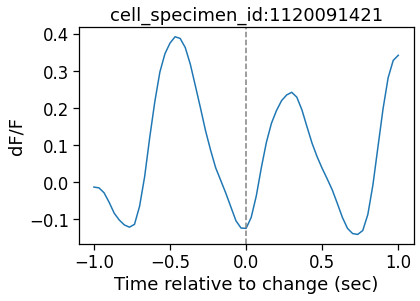

In [56]:
# Plot the average response for the cell we care about

# get the relevant data
cell_df = stimulus_response_df[stimulus_response_df.cell_specimen_id==cell_specimen_id]
# get the average dff trace
mean_trace = cell_df.trace.mean()
# get the timestamps for one row ()
timestamps = cell_df.trace_timestamps.values[0]

# make the plot
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(timestamps, mean_trace)
ax.set_title('cell_specimen_id:'+str(cell_specimen_id))
ax.set_xlabel('Time relative to change (sec)')
ax.set_ylabel('dF/F')
# Let's put a gray dotted line where the change happens 
ax.axvline(x=0, ymin=0, ymax=1, linestyle='--', color='gray')


Looks like this cell reduces its activity after an image change. I wonder if thats a property of all Sst neurons, or just this one... 

What about other cell types like Vip inhibitory neurons or Slc17a7 excitatory neurons? Are they change modulated?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Hurray!! We can exact stimulus evoked responses! Now we can finally start asking the questions we outlined at the beginning!! 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h2> Part 2 -  Tuning for stimulus & behavior during task performance </h2>

(1) Are neurons in the mouse visual cortex selective for specific visual stimuli? How reliable are their responses?

(2) Do stimulus responses differ depending on the mouse's behavioral choice during the task? 

(3) Do neurons in the mouse visual cortex modulate their activity as a function of running speed? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

To understand sensory tuning, we want to know how individual cells respond to different stimuli. We will test this out first.

To understand the impact of behavior on single cell coding, we could take a few different approaches. 

One aspect of <b>behavior</b>  is the animals behavioral <b>choice</b> during the task. 
We could ask whether stimulus tuning, or overall cell activity, is different for image changes when the mouse correctly responds to the change with a lick and got a reward(i.e. a <b>hit</b> trial), compared with changes where the mouse failed to respond (i.e. <b>miss</b> trials)

Another aspect of <b>behavior</b> is the animals overall behavioral state, such as whether they are <b>running</b> or <b>stationary</b>. 
Here we could ask whether a given cell's activity level is modulated by the overall speed of the mouse (i.e. are cells "tuned" for running speed?). Alternatively, we could look at how cell activity varies with <b>pupil diameter</b>, which is a measure of arousal and is correlated with various measures of brain state. 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Stimulus tuning & response variability </h3>

Let's start by asking whether individual cells respond differently to the 8 different images shown in each Visual Behavior Ophys session

Then we will evaluate how consistent that response is, and whether it is valid to claim that the cell "encodes" a given image. 

Let's revisit the `stimulus_response_df` for the `cell_specimen_id` we are interested in.

The `mean_response` column contains the average value of the dF/F signal (which is what we provied as the `data_type` to the `get_stimulus_response_df` function - we could replace that with `events` to use deconvolved events instead) in a pre-defined window of time following the stimulus onset (determined by the value of `response_window_duration` provided to the `get_stimulus_response_df` function above). 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the data from `stimulus_response_df` just for our `cell_specimen_id` of interest and assign it to its own variable.

Get the average value of the `mean_response` column for each unique `image_name` in the `stimulus_response_df` for our cell and plot it. 

The y-axis should be the value of the `mean_response` and the x-axis should be the `image_name`. 

Bonus points for using `pandas.groupby` for this: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html 

In [57]:
# Get data for our cell
cell_df = stimulus_response_df[stimulus_response_df.cell_specimen_id==cell_specimen_id]
cell_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,...,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,active,is_sham_change
1,6,1120091421,"[0.48840686539676137, 0.22332564557439016, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",0.146111,0.689599,0.0,30,dff,changes,...,18225,True,False,False,-99,0,0,Natural_Images_Lum_Matched_set_training_2017,True,False
6,16,1120091421,"[-0.7542644845630652, -0.7542644845630652, -0....","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.096635,0.098472,1.0,30,dff,changes,...,18675,True,False,False,-99,0,1,Natural_Images_Lum_Matched_set_training_2017,True,False
11,43,1120091421,"[-0.27913632618053036, -0.22285247401990332, -...","[-1.0, -0.9666666666666667, -0.933333333333333...",-0.049243,-0.000074,1.0,30,dff,changes,...,19890,True,False,False,-99,0,7,Natural_Images_Lum_Matched_set_training_2017,True,False
16,55,1120091421,"[-0.11058010717359511, -0.11058010717359511, -...","[-1.0, -0.9666666666666667, -0.933333333333333...",0.175423,-0.040446,0.0,30,dff,changes,...,20430,True,False,False,-99,0,8,Natural_Images_Lum_Matched_set_training_2017,True,False
21,80,1120091421,"[0.3264055709138106, 0.17985987359340455, -0.0...","[-1.0, -0.9666666666666667, -0.933333333333333...",1.325695,-0.271294,0.0,30,dff,changes,...,21555,True,False,False,-99,0,12,Natural_Images_Lum_Matched_set_training_2017,True,False


In [58]:
# Get average of mean response column for each cell
# You could do this using a for loop, but using pandas groupby is better
tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]
tuning_curve

<ipython-input-58-eaee9b77a454>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]


,mean_response
image_name,
im061,-0.029052
im062,-0.045840
im063,0.203203
im065,0.070129
im066,0.458043
im069,-0.009469
im077,0.039101
im085,0.164133


<ipython-input-59-76ef20d3d0eb>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tuning_curve.index.values, rotation=90)


Text(0, 0.5, 'dF/F')

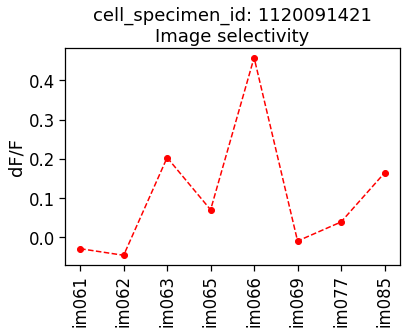

In [59]:
# Plot the mean response for each image
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(tuning_curve.index.values, tuning_curve.mean_response.values, 'or', linestyle='--')
ax.set_title('cell_specimen_id: '+str(cell_specimen_id)+'\nImage selectivity')
ax.set_xticklabels(tuning_curve.index.values, rotation=90)
ax.set_ylabel('dF/F')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now plot the `mean_response` for each individual presentation of each image, along with the mean response. 

How variable is the cell activity across repeated presentations of a given image?

Bonus points for using `seaborn.scatterplot` function with the `stimulus_response_df` dataframe for this cell as the input: https://seaborn.pydata.org/generated/seaborn.scatterplot.html


<ipython-input-60-ef760836ca01>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]
<ipython-input-60-ef760836ca01>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tuning_curve.index.values, rotation=90)


Text(0, 0.5, 'dF/F')

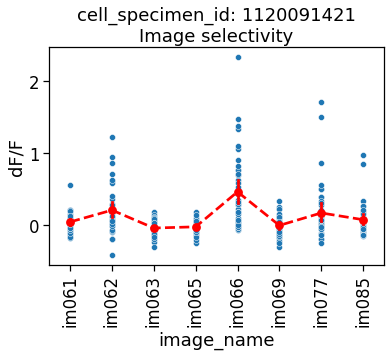

In [60]:
# Plot the mean response for each image

# Get cell data and compute tuning curve using groupby
cell_df = stimulus_response_df[stimulus_response_df.cell_specimen_id==cell_specimen_id]
tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]

# Get sorted image names for x-axis
image_names = np.sort(tuning_curve.index.values)

# Make the plot
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.scatterplot(data=cell_df, x='image_name', y='mean_response', ax=ax)
ax = sns.pointplot(data=cell_df, x='image_name', y='mean_response', order=image_names, color='r', linestyle='--', ax=ax)
ax.set_title('cell_specimen_id: '+str(cell_specimen_id)+'\nImage selectivity')
ax.set_xticklabels(tuning_curve.index.values, rotation=90)
ax.set_ylabel('dF/F')

Does this pattern reflect the true selectivity of these cells, or is it just random chance? 

One way to test thais is to ask whether image tuning differs depending on which trials you select

Let's try splitting the data, then plotting the same heatmap for the splits. Will it look the same?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the average image response for all cells in this experiment and plot it as a heatmap. 

Super mega bonus points if you use `pandas.groupby`, `pandas.pivot_table`, AND `seaborn.heatmap` for this

https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<ipython-input-61-40b86ed6ccef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuning_curves = stimulus_response_df.groupby(['cell_specimen_id', 'image_name']).mean()[['mean_response']]


<Axes: xlabel='image_name', ylabel='cell_specimen_id'>

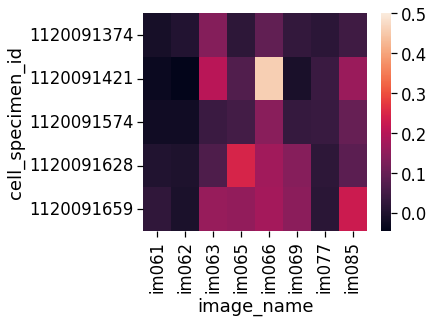

In [61]:
tuning_curves = stimulus_response_df.groupby(['cell_specimen_id', 'image_name']).mean()[['mean_response']]

tuning_curves = tuning_curves.pivot_table(values='mean_response', index='cell_specimen_id', columns='image_name')

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(data=tuning_curves, vmax=0.5, cbar=True, ax=ax)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Does this pattern reflect the true selectivity of these cells, or is it just random chance? 

One way to test this is to ask whether image tuning differs depending on which trials you select

Let's try splitting the data, then plotting the same heatmap for the splits. Will it look the same?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Splitting the data </h4>

Let's try splitting the data and checking if the tuning curves look the same when computed separately for the first and second halves of the session

In [62]:
# Get the total number of stimulus presentations and get the halfway point in the session
stimulus_presentation_ids = stimulus_response_df.stimulus_presentations_id.unique()
print('there are', len(stimulus_presentation_ids), 'stimulus presentations in this dataframe')
print('the halfway point is ~ trial', int(len(stimulus_presentation_ids)/2))

there are 312 stimulus presentations in this dataframe
the halfway point is ~ trial 156


In [63]:
# Split the data into first and second half using this threshold on stimulus_presentations_id
first_half = stimulus_response_df[stimulus_response_df.stimulus_presentations_id.isin(np.arange(0, 156))]
second_half = stimulus_response_df[stimulus_response_df.stimulus_presentations_id.isin(np.arange(156, len(stimulus_presentation_ids)))]

<ipython-input-64-eaf4686b0176>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuning_curves_first_half = first_half.groupby(['cell_specimen_id', 'image_name']).mean()[['mean_response']]
<ipython-input-64-eaf4686b0176>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuning_curves_second_half = second_half.groupby(['cell_specimen_id', 'image_name']).mean()[['mean_response']]


Text(0.5, 1.0, 'second half of trials')

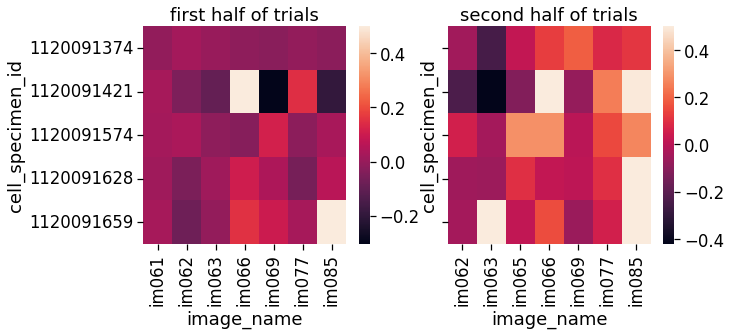

In [64]:
# Compute tuning curves for the first half, using groupby and pivot_table as we did above
tuning_curves_first_half = first_half.groupby(['cell_specimen_id', 'image_name']).mean()[['mean_response']]
tuning_curves_first_half = tuning_curves_first_half.pivot_table(values='mean_response', index='cell_specimen_id', columns='image_name')

# Compute tuning curves for the second half
tuning_curves_second_half = second_half.groupby(['cell_specimen_id', 'image_name']).mean()[['mean_response']]
tuning_curves_second_half = tuning_curves_second_half.pivot_table(values='mean_response', index='cell_specimen_id', columns='image_name')

# Plot the heatmap for the tuning curves computed on each split of the data
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True)
ax[0] = sns.heatmap(data=tuning_curves_first_half, vmax=0.5, cbar=True, ax=ax[0])
ax[0].set_title('first half of trials')
ax[1] = sns.heatmap(data=tuning_curves_second_half, vmax=0.5, cbar=True, ax=ax[1])
ax[1].set_title('second half of trials')

These look pretty different!! What could cause these differences? 

One factor is task engagement. Mice often perform the task better in the first half than the second half, because they are more motivated. 
When they are engaged, most of the trials are hits. When the mice disengage, they have a lot more misses.

We can split the data by hit and miss trials to see whether the mouse's behavioral choice influences tuning. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Does behavior choice affect stimulus response? </h3>

Let's try splitting the data based on whether each image change resulted in a <b>hit</b> or a <b>miss</b> and see if the mouse's behavioral choice influences the response of our cell of interest



![Trial_diagram.png](../../resources/Trial_diagram.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Above we looked at responses to individual images that were shown during the session. 
Now we want to look at image changes that were either a <b>hit</b>, where the mouse correctly licked following the change, or a <b>miss</b>, where the mouse failed to lick after the change. 

First we need to figure out whether the mouse correctly licked following each image change or not

We could do this by determining whether there was a lick or a reward for each trial. Let's look at the `licks` and `rewards` attributes of the dataset object

In [65]:
# Timestamps of every lick in the session
dataset.licks.head()

,timestamps,frame
0,12.57131,194
1,20.21088,652
2,21.14499,708
3,22.19586,771
4,55.25611,2753


In [66]:
# Timestamps of every reward in the session
dataset.rewards.head()

,volume,timestamps,auto_rewarded
0,0.005,313.23364,True
1,0.005,320.75645,True
2,0.005,341.02302,True
3,0.005,350.01370,True
4,0.005,368.77903,True


To figure out which image changes had a correct lick or not (and thus correspond ot a hit or a miss), we would need to compare the onset times of each image change in the `stimulus_presentations` table to the lick times in the `licks` table (or the reward times in the `rewards` table) to see if there was a lick (or a reward) within 750ms of the stimulus onset. 

This is technically straightforward but can be tedious, so to save some time so that you can focus on asking interesting questions rather than data munging, we will provide you with some tools to annotate the `stimulus_presentations` table with things like lick and reward times for each image presentation. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h4> Annotating stimulus presentations with behavior information </h4>
<p>

The `brain_observatory_utilities` package provides a useful tool to annotate the `stimulus_presentations` table with information about what happened during each stimulus, including timing of `licks`, `rewards`, and whether the trial was a <b>hit</b> or a <b>miss</b> trial. 

It will also add the average `running_speed` and `pupil_width` for each stimulus presentation. These can be used to filter data, or plot directly against cell activity to ask about he relationship between running and neural activity. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

The `get_annotated_stimulus_presentations` function can be found in the `datasets.behavior.data_formatting` module of `brain_observatory_utilities`. It takes in the <b>dataset</b> object, which contains everything it needs to know about stimulus presentations, licks, rewards, running, etc., and returns an annotated version of the `stimulus_presentations` table.

Let's check out the documentation

In [67]:
import brain_observatory_utilities.datasets.behavior.data_formatting as behavior_utils

In [68]:
behavior_utils.get_annotated_stimulus_presentations?

Signature:
behavior_utils.get_annotated_stimulus_presentations(
    ophys_experiment,
    epoch_duration_mins=10,
)
Docstring:
Takes in an ophys_experiment dataset object and returns the stimulus_presentations table with additional columns.
Adds several useful columns to the stimulus_presentations table, including the mean running speed and pupil diameter for each stimulus,
the times of licks for each stimulus, the rolling reward rate, an identifier for 10 minute epochs within a session,
whether or not a stimulus was a pre-change or pre or post omission, and whether change stimuli were hits or misses
:param ophys_experiment: obj
    AllenSDK BehaviorOphysExperiment object
    A BehaviorOphysExperiment instance
    See https://github.com/AllenInstitute/AllenSDK/blob/master/allensdk/brain_observatory/behavior/behavior_ophys_ophys_experiment.py  # noqa E501
:return: stimulus_presentations attribute of BehaviorOphysExperiment, with additional columns added
File:      /opt/conda/lib/python3

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the `get_annotated_stimulus_presentations` function to get the annotated stimulus presentations table and assign it to a variable called `annotated_stim_table`. Inspect the columns.

In [69]:
# Provide dataset object to run the function
annotated_stim_table = behavior_utils.get_annotated_stimulus_presentations(dataset)

In [70]:
# Look at the output
annotated_stim_table.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,...,time_from_last_change,pre_change,licked,lick_on_next_flash,pre_omitted,post_omitted,reward_rate,engaged,engagement_state,epoch
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
1,1,change_detection_behavior,0,im065,-99,0.25021,309.366891,309.617101,17985,18000,...,NaN,False,False,False,False,<NA>,inf,True,engaged,0
2,1,change_detection_behavior,0,im065,-99,0.25022,310.117501,310.367721,18030,18045,...,NaN,False,False,False,False,False,inf,True,engaged,0
3,1,change_detection_behavior,0,im065,-99,0.25019,310.868141,311.118331,18075,18090,...,NaN,False,False,False,False,False,inf,True,engaged,0
4,1,change_detection_behavior,0,im065,-99,0.25020,311.618751,311.868951,18120,18135,...,NaN,False,False,False,False,False,inf,True,engaged,0
5,1,change_detection_behavior,0,im065,-99,0.25022,312.369321,312.619541,18165,18180,...,NaN,True,False,False,False,False,inf,True,engaged,0


In [71]:
# Look at all the useful new columns!
annotated_stim_table.columns

Index(['stimulus_block', 'stimulus_block_name', 'image_index', 'image_name',
       'movie_frame_index', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'movie_repeat', 'flashes_since_change', 'trials_id', 'stimulus_name',
       'active', 'is_sham_change', 'licks', 'mean_running_speed',
       'mean_pupil_width', 'change_time', 'go', 'catch', 'aborted',
       'auto_rewarded', 'hit', 'miss', 'false_alarm', 'correct_reject',
       'response_time', 'response_latency', 'reward_time', 'reward_volume',
       'time_from_last_change', 'pre_change', 'licked', 'lick_on_next_flash',
       'pre_omitted', 'post_omitted', 'reward_rate', 'engaged',
       'engagement_state', 'epoch'],
      dtype='object')

To be able to sort cell activity based on whether each image change in the stimulus table was a hit or a miss, we will want to merge the `stimulus_response_df` and with this new annotated table. Let's recompute the stimulus response dataframe and merge it with the `annotated_stim_table`.

In [72]:
# Get the stimulus response dataframe just for image changes
stim_response_df = data_formatting.get_stimulus_response_df(dataset, data_type='dff', event_type='changes',
                                                            time_window=[-1, 1], response_window_duration=0.5,
                                                            interpolate=True, output_sampling_rate=None)

# Merge it with the annotated stim table so you can filter cell responses based on behavior choice                                                       
stim_response_df = stim_response_df.merge(annotated_stim_table, on='stimulus_presentations_id')


100%|██████████| 5/5 [00:00<00:00, 16.79it/s]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>
Now we can plot tuning curves separately for hits and misses.

Limit the `stimulus_response_df` to image changes, then split by hit & miss trials. 

Plot our cell's image tuning curve (and the variability around the mean) using seaborn's pointplot, showing hits and misses using different colors

In [73]:
cell_df = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id]
hits = cell_df[(cell_df.is_change)&(cell_df.hit)]
misses = cell_df[(cell_df.is_change)&(cell_df.miss)]

<ipython-input-74-df5494ee726e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]
<ipython-input-74-df5494ee726e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tuning_curve.index.values, rotation=90)


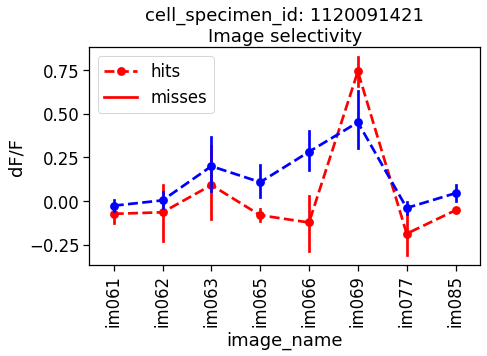

In [74]:
# Plot the mean response for each image split by hit and miss

cell_df = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id]
tuning_curve = cell_df.groupby(['image_name']).mean()[['mean_response']]

fig, ax = plt.subplots(figsize=(7,4))
# ax = sns.scatterplot(data=hits, x='image_name', y='mean_response', ax=ax, color='pink')
ax = sns.pointplot(data=hits, x='image_name', y='mean_response', color='r', linestyle='--', ax=ax)
# ax = sns.scatterplot(data=misses, x='image_name', y='mean_response', ax=ax, color='cyan')
ax = sns.pointplot(data=misses, x='image_name', y='mean_response', color='b', linestyle='--', ax=ax)
ax.set_title('cell_specimen_id: '+str(cell_specimen_id)+'\nImage selectivity')
ax.set_xticklabels(tuning_curve.index.values, rotation=90)
ax.set_ylabel('dF/F')
ax.legend(['hits', 'misses'], loc='upper left')

What if it isnt actually the mouse's choice thats influencing the differences in activity seen here? 

What if the mouse runs more or less in the first and second half of the experiment, or if the pupil diameter is correlated with whether or not the mouse receives a reward or not?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Are cells tuned for running speed or pupil diameter? </h3>

Another factor that could influence neural variability and contribute to neural encoding is locomotor behavior, or the behavioral state of the animal. Many studies have shown that animal movement and overall arousal state can influence the gain of sensory tuning. Running and other movements are also directly encoded by some neurons in the visual cortex, independent of stimulus identity. 

The dataset object contains info about the mouse's `running_speed`, in addition to information about pupil diameter and gaze location in the `eye_tracking` attribute. Running speed and pupil diameter are typically correlated, and both can be used as measures of overall arousal and behavioral state. 

Let's plot the activity of our Sst cells as a function of the mouse's running speed or pupil diameter to see if these neurons encode behavioral variables.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the `running_speed` attribute of the dataset object and plot the running speed. 

Remember that running speed is sampled at the stimulus display frequency, so you can use `stimulus_timestamps` to plot time on the x-axis. 

Text(0.5, 1.0, 'Ophys experiment ID 1080945462')

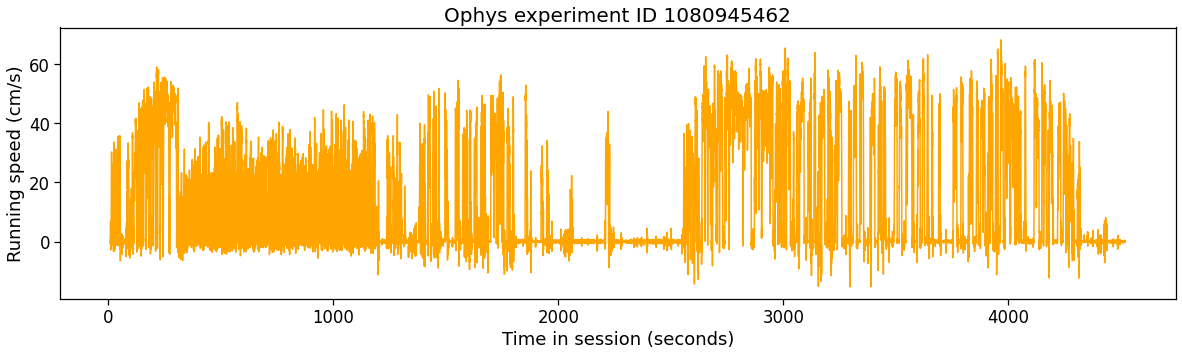

In [75]:
# Plot the running speed, with stimulus_timestamps on x-axis

fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(dataset.stimulus_timestamps, dataset.running_speed['speed'], color='orange', linestyle='-')
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Running speed (cm/s)')
ax.set_title('Ophys experiment ID {}'.format(ophys_experiment_id), fontsize = 20)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `eye_tracking` attribute of the dataset object. What are the columns? 

Plot `pupil_area` over time. 

In [76]:
# Whats in the eye_tracking table?
dataset.eye_tracking.head()

,timestamps,cr_area,eye_area,pupil_area,likely_blink,pupil_area_raw,cr_area_raw,eye_area_raw,cr_center_x,cr_center_y,...,eye_center_x,eye_center_y,eye_width,eye_height,eye_phi,pupil_center_x,pupil_center_y,pupil_width,pupil_height,pupil_phi
frame,,,,,,,,,,,,,,,,,,,,,
0,0.18393,130.298881,69377.698731,33673.240498,False,33673.240498,130.298881,69377.698731,239.119872,261.345519,...,251.507367,249.450037,162.755074,135.686138,-0.112888,252.891831,249.216575,94.347357,103.530311,-0.057726
1,0.19730,120.969632,69424.125570,32157.121188,False,32157.121188,120.969632,69424.125570,239.060212,261.688425,...,251.739167,249.518556,162.106561,136.320118,-0.114363,253.686626,249.194154,95.002512,101.172771,-0.009237
2,0.20457,118.469282,69532.491033,30610.926197,False,30610.926197,118.469282,69532.491033,238.667035,261.626304,...,251.765705,248.607848,162.768950,135.977281,-0.103537,252.373206,248.036840,94.481371,98.710488,-0.157400
3,0.23025,109.225777,69369.036385,32355.697657,False,32355.697657,109.225777,69369.036385,238.783878,261.975695,...,252.266157,249.065804,162.359517,135.999728,-0.095117,251.198744,250.107586,94.488796,101.484671,0.138696
4,0.26757,112.396794,69396.405593,30382.966716,False,30382.966716,112.396794,69396.405593,238.387263,261.896105,...,251.472874,249.306866,162.014394,136.343206,-0.121260,251.878161,248.939072,94.486745,98.342253,-0.053665


Text(0.5, 1.0, 'Ophys experiment 1080945462')

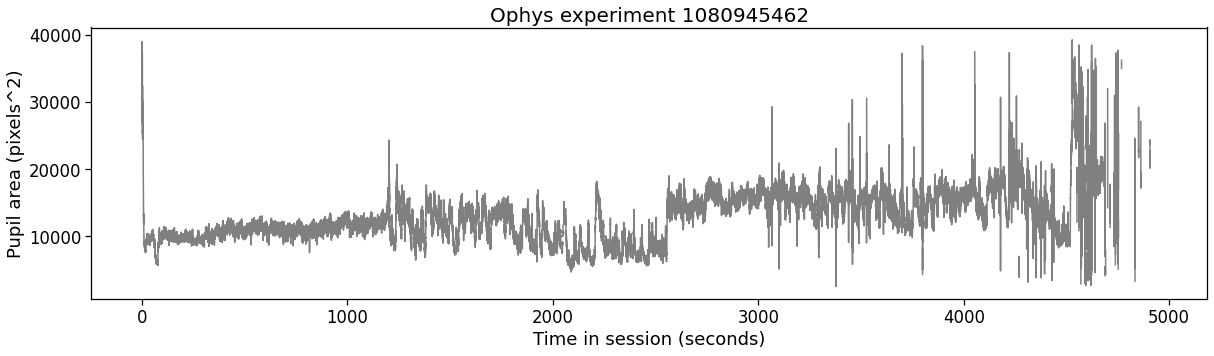

In [77]:
# Plot the pupil area over time
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(dataset.eye_tracking.timestamps, dataset.eye_tracking.pupil_area, color='grey')
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Pupil area (pixels^2)')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

A note about filtering and signal processing

Note that there are some very large spikes in the pupil area in some parts of the session. These are probably artifacts of the pupil detection algorithm, and could be filtered out using `scipy.signal.medfilt`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html. This function works by setting each point to be the median of its immediate neighborhood of `kernel_size` points, so is a good tool for data with obvious outliers. 

Note that because kernel size is measured in points rather than timebins, this function makes the most sense to use when sampling rates are fairly consistent.

Text(0.5, 1.0, 'Ophys experiment 1080945462')

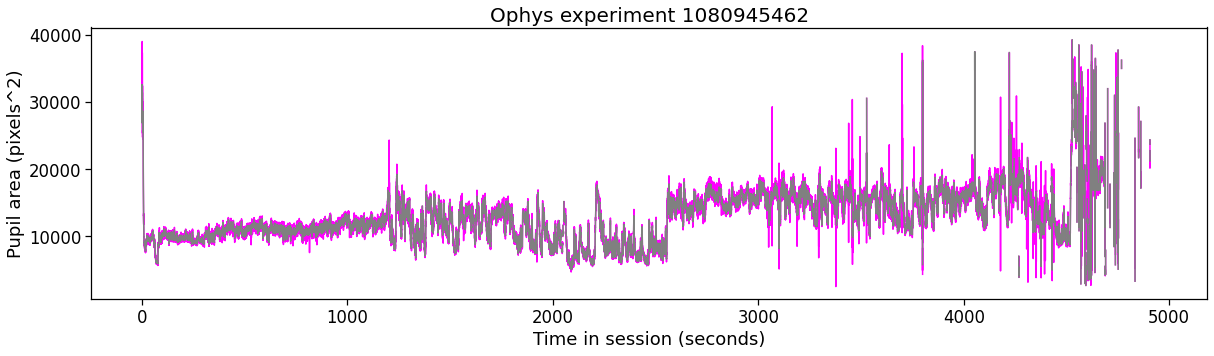

In [126]:
from scipy.signal import medfilt

fig, ax = plt.subplots(1,1, figsize = (20,5))
fit_pupil_area = medfilt(dataset.eye_tracking.pupil_area, kernel_size=21)   
ax.plot(dataset.eye_tracking.timestamps, dataset.eye_tracking.pupil_area, color='magenta')
ax.plot(dataset.eye_tracking.timestamps, fit_pupil_area, color='gray')

ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Pupil area (pixels^2)')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

Now that we have a handle on this behavior data, lets try plotting running speed and tuning together. Do they look like they might be related to one another?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Plot the `running_speed` and `pupil_area` on the same axies

Text(0.5, 1.0, 'Ophys experiment 1080945462')

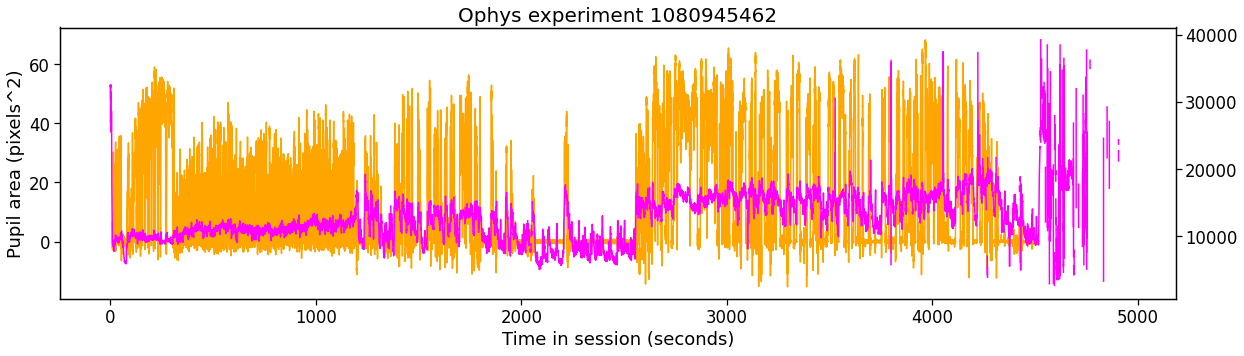

In [127]:
fig, ax = plt.subplots(1,1, figsize = (20,5))
fit_pupil_area = medfilt(dataset.eye_tracking.pupil_area, kernel_size=21)   
ax.plot(dataset.stimulus_timestamps, dataset.running_speed['speed'], color='orange')

ax2 = ax.twinx()
ax2.plot(dataset.eye_tracking.timestamps, fit_pupil_area, color='magenta')

ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Pupil area (pixels^2)')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Tuning for continuous variables </h4>

One challenge in working with these data is that running, eye tacking, and neural activity are all sampled on separate data streams with different timestamps. This means that even though these data were all collected at the same time, there isn't necessarily a one-to-one matchup between timestamps in one data stream or other.

The most common solution to this solution to this problem is data resampling. Typically timestamp bins are defined, and data are resampled into a common time stream. What size bin should you use? This depends on the timescale that is relevant to the analysis at hand.

For today, we will be using stimulus-presentation bins to look at our data over a relatively large timescale. Specifically, we will use the `stimulus_response_df` that we generated above, which contains the mean response for each stimulus presentation, along with the `annotated_stimulus_presentations` table that we merged into it, which contains the mean running speed for each stimulus presentation. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Get the stimulus response data for our special cell and plot `running_speed` and `mean_response` against each other

In [128]:
# Get the stimulus response dataframe just for a particular cell
cell_df = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id]

Now that we have binned data, lets try plotting the relationship between running speed and the activity of our cell.  


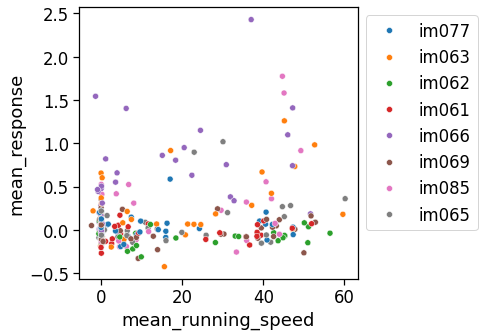

In [129]:
# Plot this cells mean response versus running speed for each stimulus presentation
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=cell_df, x='mean_running_speed', y='mean_response', 
                hue='image_name', ax=ax)
ax.legend(bbox_to_anchor=(1,1))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Repeat using the `mean_pupil_width` column.

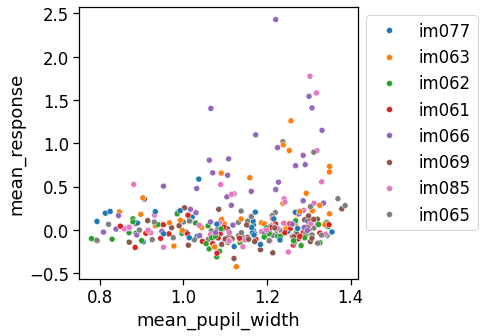

In [130]:
# Plot mean pupil width across trials against this cells mean response
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=cell_df, x='mean_pupil_width', y='mean_response', 
                hue='image_name', ax=ax)
ax.legend(bbox_to_anchor=(1,1))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>


Great! Our cell encodes both pupil diameter and running speed. 

You will recall, however, that these variables themselves are also correlated looked like they might have had a relationship to each other. Now that we have nicely binned data, try explicitly plotting the relationship between `mean_pupil_width` and `mean_running_speed`

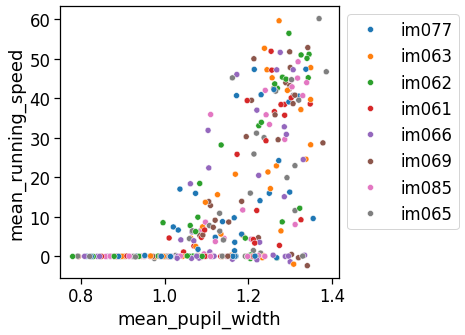

In [131]:
# Plot pupil width and running speed binned by stimulus presentations against each other

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=cell_df, x='mean_pupil_width', y='mean_running_speed', 
                hue='image_name', ax=ax)
ax.legend(bbox_to_anchor=(1,1))

So...which of the factors best explains the variability in trial-to-trial responses of our cell? 

In the next section, we will dive deeper into this problem. Specifically, we will use regression models to pull apart the variance explained by different concurrent features on their own, as well as their interactions.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Part 3 -  Quantifying single cell coding with regression models </h2>

Up to now, we looked at how single cell activity varies across different conditions, like which image was shown, or whether the mouse was running or not. 
But are these conditions reliable predictors of cell activity? 

To say that a cell "encodes" something, we want to know that the cell activity is reliably predictable based on that something. 
In other words, can we model a cell's activity based on different variables or predictors?

Regression models provide a mathematical framework for investigating these questions. Here, we will use linear regression to investigate which behavioral features are encoded by neurons.


Questions: 
    
(1) How can linear regression be used to model neural coding? 

(2) How do you ensure that your model is valid and is not overfitting?

(3) How well can you predict neural activity based on stimulus information? Behavioral information? 

(4) Does the prediction improve when additional variables are included? 



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h3> Linear regression </h3>

    
In a regression problem, we are have pairs of data points  $(𝑥⃗_𝑖,𝑦_𝑖)$
  where  𝑖∈[1,𝑁]. We want to develop a function  $𝑓(𝑥⃗ )$
  such that  $𝑓(𝑥⃗_𝑖)≈𝑦_𝑖$
  for each pair of points in the data set.
    
    
The simplest regression problem is linear regression, in which we try to create the function $f$ by linearly combining a set of functions that act on the points $x$.

$f(\vec{x}_i) = \sum_j w_j \phi(\vec{x}_i)$

The functions $\phi(\vec{x})$ are chosen according to the question you are trying to answer. They are often called "features".  
    
The coefficients $w_j$ are called "weights." When we talk about fitting a regression model, what we mean is determining the best set of weights for our  $𝑓(𝑥⃗_𝑖) \rightarrow 𝑦_𝑖$ mapping? 



But what is the "best" set of weights? We try to choose the weights that minimize overall error between $f(x)$ and $y$.In the case of linear regression we use the sum of squared residuals between our for each $𝑓(𝑥⃗ 𝑖)$ and the corresponding $y_i$:

$E = \frac{1}{2} \sum_i \left | y_i - f\left ( \vec{x}_i \right ) \right |^2 = \frac{1}{2} \sum_i \left | y_i - \sum_j w_j \phi (\vec{x}_i ) \right |^2 $



This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.



The `scikit-learn` website:  http://scikit-learn.org/stable/

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Question 1: How can linear regression be used to model neural coding? </h3>
<p>

You may be familiar with a version of linear regression where the functions  𝜙 are chosen to be the identity and a constant. When the input space is one dimensional this is:

$𝑓(𝑥_i)=\sum_j w_j \phi(\vec{x}_i) = 𝑤𝑥_i+c$

This simple model assumes that $f(x)$ scales linearly as a function of $x$. 

However, even if the variables in our model do not have a perfect linear relationship, this model might still be useful; in practice, so long as $x$ and $y$ have a monotonic relationship, we would still expect to see the model explain some fraction of the variance in our data. This is equivalent to saying that $x$ and $y$ are linearly correlated.

Above, we noted that some cells have a correlation with the animals pupil width during each stimulus. First, lets use linear regression to mathamatically formalize this relationship. 

Once again, we can use the `stimulus_response_df` we computed to get the mean pupil width and mean response for each stimulus presentation. We will use these to start fiting our model. This time around, however, pupil width will be `X` and mean response will be `y` to be consistent with the math above.

Text(0, 0.5, 'Mean cell response')

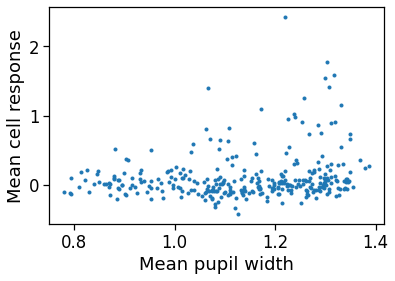

In [132]:
# To match the equations above and the sklearn convention,
# We will call our predictor / encoded variable "X" and our response variable "y"
X = cell_df.mean_pupil_width.values
y = cell_df.mean_response.values
fig,ax = plt.subplots()
ax.plot(X, y, '.')
ax.set_xlabel('Mean pupil width')
ax.set_ylabel('Mean cell response')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

You are most likely familiar with the concept of (linear) correlations. If $X$ an $y$ are correlated, then covariance in $X$ and $y$ will arroach the variance in $X$ and $y$ on their own. We often use a quantity called "pearsons correlation" or "pearsons r" to quanitify this:
    
$$R_{pearson} = \frac{Cov(X,y)}{\sigma_X\sigma_y}$$
    
This number gives us the fraction of variance we in one variable that can be described by knowing the other variable. The maximum value that can be acheived by this metric is 1, which means that $X$ and $y$ covary perfectly together. The minimum value of -1 says that their variance is oposite one another (i.e. when $X$ goes up $y$ goes down). A value of zero means that there is no similarity between the variance of the two variables.
    
If $X$ and $y$ are correlated (or anti-correlated!), we will fit a non-zero value for $w$ when we do our model fit. However, simply noting the correlation would be *Descriptive* - it wouldn't tell us anything about how consistent this correlation is across the dataset. A few spurious data points could lead to a correlation that does not hold throughout our data. 

`scipy` has pre-implemented calculators for data correlation. Here, we can quickly test if, for example, our data are pearson correlated.

In [133]:
from scipy.stats import pearsonr

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use `pearsonr` to compute the correlation between the mean cell response and the mean pupil width on each stimulus presentation.

In [134]:
# Compute the correlation of X and y (pupil width and cell activity)
pearson_corr,pearson_pval = pearsonr(X,y)
pearson_corr

0.19368426978396674

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Regression provides a *Predictive* model. For new values of $x$, we can produce an estimate of what $y$ should be. Importantly, the predictive nature of our model also proves to be an important tool for assessing whether our model consistently represents our data. 

We do this by splitting our dataset into parts. Just as we did above, we will train the model on on part of our dataset, then evaluate it on data that was withheld from this initial training.

In [135]:
# Split the data 
from sklearn.model_selection import train_test_split

np.random.seed(4)# Setting the random seed here insures that everyone gets the same result when they run this notebook!

# Use sklearn train_test_split 
y_train, y_test, X_train, X_test = train_test_split(y, X)

In [136]:
# What do each of these splits look like? 
print('length of y_train', len(y_train))
print('length of y_test', len(y_test))
print('length of X_train', len(X_train))
print('length of X_test', len(X_test))


length of y_train 234
length of y_test 78
length of X_train 234
length of X_test 78


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Now that we have our data ready, we can import the `scikit-learn` package (we will call it "sklearn" to save some typing). It has a nice interface for fitting regression models that allows us to not worry about implementing our own solution for the cost function above.

In [137]:
from sklearn.linear_model import LinearRegression

The sklearn interface is object oriented. This means that to fit a model, we need to instantiate a "LinearRegression" object. We will then use this for to handle our fitting.

In [138]:
# Initialize the LinearRegression object
LR = LinearRegression()

Now that we have our object, we can fit data using the built in "fit" function.

In [139]:
# Note that LinearRegression requires X to be two dimensional - why this is will be apparent shortly
LR.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

<!-- Thats it! We have our first model!  -->

We can now look carefully at the `sklearn` object to learn about the model fit we just performed. Here, `coef_` contains the weight vector $\vec{w}$ for our model, and `intercept_` contains the constant $c$

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Examine the `coef_` and `intercept_` attributes of the `LinearRegression` object.

In [140]:
# Print the coef_ attribute of the LinearRegression object
LR.coef_

array([0.43830462])

In [141]:
# print the intercept_ attribute of the LinearRegression object
LR.intercept_

-0.38351225429121255

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now that we know the weight and intercept for this model, plot the line we just fit, overlaid with the data.

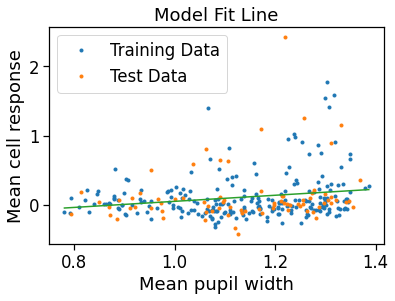

In [142]:
# Plot x and y values
fig,ax = plt.subplots()
ax.plot(X_train, y_train,'.', label='Training Data')
ax.plot(X_test, y_test,'.', label='Test Data')
# Plot the fit 
xx = [np.min(X), np.max(X)]
ax.plot(xx,LR.coef_*xx+LR.intercept_)
ax.set_xlabel('Mean pupil width')
ax.set_ylabel('Mean cell response')
ax.set_title('Model Fit Line')
ax.legend();


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Now let's look at how well our model does at predicting data.

The `LinearRegression` object has a method to evaluate the `score` of the model. 
    
The default score used in `sklearn` is called the coefficient of determination, or $R^2$. This number gives the fraction of the variance in in a dataset that is described by the model. Specifically, it compares the ratio of the sum of squared residuals for the model:
    
   $$SS_{residuals} = \sum_i{(y_i-f_i)^2}$$
    
And compares this the sum of squared residuals if you had just used the mean of your data, $\bar{y}$, as your model (this will be proportional to the model variance). This later quanity is called the "total sum of squares"
    
   $$SS_{total} = \sum_i{(y_i-\bar{y})^2}$$
$R^2$ is defined:
    
 $$R^2 = 1-\frac{SS_{residuals}}{SS_{total}}$$
    

$R^2$ will be 1 for a model that captures 100% of the avalible variance, and 0 for a model that captures non. If can also be less than 0 if using your model provides a worse prediction if you had just guessed with the mean of your data!

Lets compute the score for our training data.

In [143]:
# How did we do with our training data?
training_score = LR.score(X_train.reshape(-1,1), y_train)
training_score

0.04143414954968527

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
One more quick note about $R^2$. You will have noticed that earlier we computed $R_{pearson}$ value. If your $X$ and $y$ are the same, then $R^2 = R_{pearson}^2$. This later definition of $R^2$ is ultimatly more useful for us here, however, because it will allow us to quantitativly assess model predictions on new data!



In [144]:
training_r = pearsonr(X_train, y_train)[0]
training_r**2

0.041434149549685544

Is this number meaningful? We will delve into this now.


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Question 2: How do you ensure that your model is valid and is not "overfitting"?</h3>
<p>

"Overfitting" is a term used to describe the case in which learns does very well in describing the data that it is trained on, but fails to predict new or additional data. Another way of saying this that a model will learn to describe noise or idiosyncrasies of the training data, rather than the underlying relationships that you are trying to model.

To illustrate overfitting, lets pause for a quick thought experiment. Imagine that, instead of fitting the two parameter model we just used, we fit a model with $N$ parameters where $N$ is the number of data points. Our model, which could look like this:

$𝑓(𝑥_i)=\sum_{i = [1,N]} w_i\vec{x}_i$

We call this a "saturated model" because it is saturated with parameters. Once we fit this model, we would discover that we could now *perfectly* predict every single data point. In this linear case, we would now find $f(x_i)=y_i$, with error of 0. 

So...why don't we do this? Wasn't our goal to get the lowest error possible? 

You have probably already noticed the two big problems with this saturated model. First, we can't learn anything from its weights. Regression is guided dimensionality reduction exercise, where we try and describe our data with a chosen set of features. The saturated model fails to do this. Second, this model is worthless for explaining new data. It assumes a 1-to-1 $x_i\rightarrow y_i$ mapping, and is undefined for new points or allows assumes no variance for repeated observations.

Even if we move away from this extreme case, it is still possible to overfit a model simply by fitting weights to too many features. Spurious correlations in your data will appear to be explained by the additional features in your training data, only to limit your ability to predict held out data. 

<b>
In this section, we will introduce a technique known as "Cross-Validation" as a way to systematically test if you have a "good" model.

<p>



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

*One more aside about saturated models: the deliberately overfit saturated model is always going to be the model with the lower error possible error. It is therefore useful as as a comparison tool to determine how well your model fit does. In the linear case, the error of the saturated model is always 0 so we don't really need to think about it. If, however, we are doing non-linear regression, the saturated model becomes a useful in assessing model performance.*

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

What is the models performance on our held-out testing data (`X_test` and `y_test`?

Use the `score` method again, but provide the held out test data instead.

Is it lower or higher than the score for the training data? Is it greater than or less than zero? What can we learn from answering these questions?


In [145]:
# Compute the score for the held out test data
LR.score(X_test.reshape(-1,1),y_test)

0.028250165482394562

A score of .028 indicates that we explain 2.8% of the variance in our test data by using this model. This isn't a lot, and it is lower than the variance we explained using the training data suggesting that we aren't doing quite as well at predicting the pupil-neuron relationship in this new data. However, it is greater than 0, which means our model has SOME predictive power, even if it is small!

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

This "training" and "testing" split approach would be great if data were always cheap and plentiful. In practice however, it can be frustrating to use most of your hard-earned data to train a model, only learn how it performs on a held out subset.

A common aproach to dealing with this problem is known as <b>*Cross Validation*</b> Here, we systematically hold out chunks of data, refitting our model on the remaining data each time. By performing multiple model fits, we can (1) use all our data and (2) get a better sense of how our data varies across the dataset.

There are many ways to do cross validation, and how you split things up can have a big influence on the question you are trying to answer. Lets start with one of the simplist and most common forms of cross validation, known as <b>KFolds</b>. Here, we split (i.e. fold) our data $k$ times, with equal sample sizes in each fold. We then fit $k$ models to our data. 

What is <b>$k$</b>? We will use 5 for now. It can be anywere from 2 to $n$ where $n$ is the number of samples in your dataset. This extreme case, where $n$ is the same as the number of samples you have is called "leave-one-out" cross validation.



Here is an example of how to do 5 fold cross validation

In [146]:
# Simple 5 fold cross validation
n_folds = 5
fold_num = np.zeros(len(X))

# Assign data into 5 groups:
fold_group = np.arange(0,len(X))%n_folds
fold_group

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,

Now that we have groups, we can loop through and fit a model to each.

In [147]:
# Compute the test & training score for each fold

# Create an empty array to save the data in
self_score = np.empty(n_folds)
cross_score = np.empty(n_folds)
# Loop over folds, fit the model, and compute the scores on training & test data
for ii in range(n_folds):
    lr = LinearRegression()
    lr.fit(X[fold_group!=ii].reshape(-1,1), y[fold_group!=ii])
    self_score[ii] = lr.score(X[fold_group!=ii].reshape(-1,1), y[fold_group!=ii])
    cross_score[ii] = lr.score(X[fold_group==ii].reshape(-1,1), y[fold_group==ii])

# Print out the results
print(f'Training Score: {self_score}')
print(f'Testing Score: {cross_score}')


Training Score: [0.03664552 0.02939928 0.0367122  0.04242109 0.04378197]
Testing Score: [-0.02002886  0.07146236 -0.06701194  0.02163582  0.00956463]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

What is the average test score across folds?

In [148]:
# Take the mean of the scores across folds
np.mean(cross_score)

0.00312439864097831

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

`sklearn` provides a convient object for splitting data, so that you don't need to write your own splitting code. It is called `KFolds` and is housed in the `model_selection` modual.

Just as we did with the `Regression` object, the `scikit-learn` interface has us instantiate a `KFold` object, which provides a generator object that we can use to loop through our data.

In [149]:
from sklearn.model_selection import KFold

# Generate the folds
folderizer = KFold(n_splits=5)
folderizer.split(X,y)

<generator object _BaseKFold.split at 0x7fc23bce3e40>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

What is a generator object? Each time it is called, it will generate the next of n folds in our data. It can therefore be incorporated into a for loop using the following syntax:

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Let's repeat the exercise above, to fit the model and compute the score across folds, but now using the `KFold` generator object

In [150]:
# Initialize KFold object
n_folds = 5
folderizer = KFold(n_splits=n_folds,)

# Create an empty array to save the data in
self_score = np.empty(n_folds)
cross_score = np.empty(n_folds)
# Loop through folds, fit model, save scores
for ii, (train_index, test_index) in enumerate(folderizer.split(X, y)):
    lr = LinearRegression()
    lr.fit(X[train_index].reshape(-1,1), y[train_index])
    self_score[ii] = lr.score(X[train_index].reshape(-1,1), y[train_index])
    cross_score[ii] = lr.score(X[test_index].reshape(-1,1), y[test_index])
# Print out the results
print(f'Training Score: {self_score}')
print(f'Testing Score: {cross_score}')

Training Score: [0.04488332 0.03662592 0.03801326 0.02817329 0.04056242]
Testing Score: [-0.0378296   0.03437174 -0.04101175  0.0233176   0.00756938]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

And once again, compute the average testing score across folds. 

(1) Is it different from what we did before? Why? Hint: Note how we split the data before and compare to KFolds: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

(2) What does this tell us about pupil responses in our data?

In [151]:
# Take the mean and print it out
print(f'Average Testing Score: {np.mean(cross_score)}')

Average Testing Score: -0.002716529144150592


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3>Question 3: How well can you predict neural activity based on stimulus information? Does the prediction improve when additional variables are included?</h3>

One of the useful things about regression models is that that can be used evaluate the role of different kinds of features in predicting data. 

Earlier, we saw that examples of how stimulus identity can be encoded by the activity of a single neuron. Here, we will recast this tuning problem as a regression problem, allowing us to use our regression tool-box to understand this tuning. 

We will then see how using a common modeling framework allows us to quantitatively compare the encoding of different features by analyzing the contribution of each feature to explaining variance in neural activity.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3>Casting tuning as a regression problem</h3>
    
    
Because our stimulus here consists of a set of 8 discrete images, we need to adapt this framework to make predictions based on predictions are based on a categorical rather than continuous variable (i.e., one of $8$ possible images). In other words, as above, we seek a model of the form:

$$y = \beta x+C,$$

where $y$ is the calcium response, $X$ is now the stimulus identity (a catigorical variable), and $\beta$ and $C$ are constants. 

One way to handle this would be to construct a separate model for each orientation:
$$y = \beta_1 X_1+C_1$$
$$y = \beta_2 X_2+C_2$$
$$\vdots$$
$$y = \beta_8 X_8+C_8 $$
    
Mathematically, this is cumbersome - we would need to look up which equation to use each time we want to predict new data. A more elegant alternative is to combine predictors across orientations into a single model that simply operates piecewise:

$$y = C+ \begin{cases} 
\beta_1 \text{I}_1(X)  \\
\beta_2 \text{I}_2(X) \\
\vdots \\
\beta_8 \text{I}_8(X)
\end{cases}$$
    
where $\text{I}_n(X)$ is the <i>indicator function</i>:
$$ \text{I}_n(X) := \begin{cases}
1 \text{ if } X=n, \\
0 \text{ else}
\end{cases} $$

(Notice that this formulation merges the constants into one value, $C$. $C$ is, effectivly, the offset from zero for any model we fit.)

Thus, as $X$ encodes the stimulus identity, $\text{I}_n(X)$ determines which term in the equation we are operating with. This type of problem is called *"One-Hot"* encoding, because $X$ encodes what part of the equation is active. Practically speaking, we can implement this indicator function by creating a vector for each sample and setting $X_i = 1$ for whichever case is true. For example, if we had just two stimulus types, we might have: 

$$ X_1 = [1,0] $$
$$ X_2 = [0,1] $$ 

Finally, if we have many observations, we can stack each of these $X$ observations to form a "Design Matrix." 

We will have a corresponding fitting parameter vector, $$\beta = [\beta_1,\beta_2,\ldots,\beta_8]$$

Our whole problem can now be written: 
$$y = \beta X$$ 

    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Let's build out our X matrix, as described above, using the stimulus identity for each stimulus presentation

In [152]:
# Build the X matrix, which is the image identity presented on each trial, encoded as a one-hot vector

# Get index for each image for each stimulus presentation
# By setting the "return_inverse" function of the unique command, you will return
# (1) the list of unique image names and (2) index into that list of each image presentation
img_names,img_index = np.unique(cell_df.image_name.values,return_inverse=True)

# Create an array the length of stimulus presentations by 8 (the number of images)
X = np.zeros((len(img_index),8))
# Loop through image indices and build up the X matrix 
for ii in range(len(img_index)):
    X[ii,img_index[ii]]  = 1


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now plot it. Label the axes. 

Text(0.5, 0, 'Image')

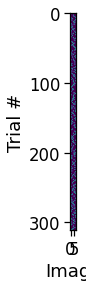

In [153]:
# Plot the X matrix 
fig, ax = plt.subplots()
ax.imshow(X) 
ax.set_ylabel('Trial #')
ax.set_xlabel('Image')

Looks pretty gross, right? X is too tall a matrix to be easily visualized. Lets zoom in on the first bit of it to get a sense for whats really going on.

Text(0.5, 0, 'Image #')

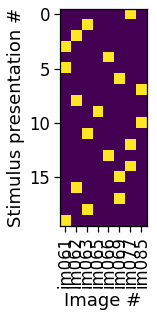

In [154]:
# This is more intuitive if we zoom in
fig,ax = plt.subplots()
ax.imshow(X[:20]) 
ax.set_ylabel('Stimulus presentation #')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation = 90)
ax.set_xlabel('Image #')


Now that we have our design matrix, X, using using it to fit a model is quite simple. We use the same `LinearRegression`` object as before, but now fit with our new design matrix.  



In [155]:
# Set up the model with the LinearRegression object and our new design matrix X, with the cell activity y
model = LinearRegression(fit_intercept=False).fit(X,y)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Earlier, we plotted the tuning curve for this same cell. Lets replot here:

<ipython-input-156-d3291e3f5815>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tuning_curve.index.values, rotation=90)


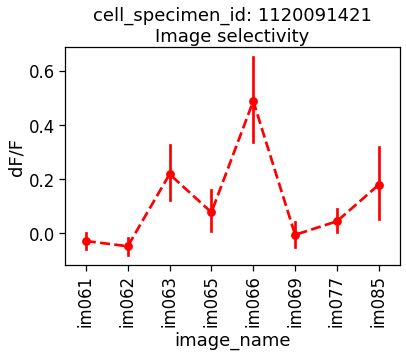

In [156]:
# Make the plot
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.pointplot(data=cell_df, x='image_name', y='mean_response', order=image_names, color='r', linestyle='--', ax=ax)
ax.set_title('cell_specimen_id: '+str(cell_specimen_id)+'\nImage selectivity')
ax.set_xticklabels(tuning_curve.index.values, rotation=90)
ax.set_ylabel('dF/F');

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now plot the model coefficients, which are the predictions of the cell's response for each image. 

How does this compare to the tunning curve?

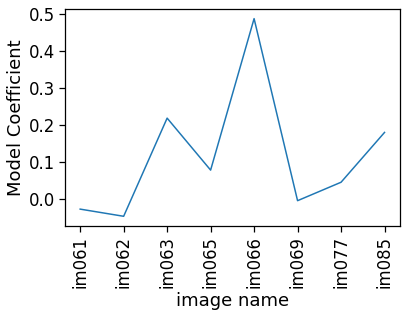

In [157]:
# Plot the coef_ attribute. Label the axes. 
fig,ax = plt.subplots()
ax.plot(model.coef_)
ax.set_xlabel('image name')
ax.set_ylabel('Model Coefficient')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation = 90);


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

You will have notice that we used a new setting when we created the `LinearRegression` object, `fit_intercept=False`. This prevents `LinearRegression` from fitting the constant/intercept term in our model. 

If we were to include this term, the model fit would be ill posed. Our model performance would be the same, but our data would be shifted by an aribtary constant. To see this, try fitting a model with `fit_intercept=True` and looking `coef_` and `intercept_`.

In [180]:
# Fit the model with fit_intercept = True and look at the coefficients and intercept
funky_model = LinearRegression(fit_intercept=True).fit(X, y)
print(f'Coefs: {funky_model.coef_}')
print(f'Intercept: {funky_model.intercept_}')

Coefs: [-2.17439289e+13 -2.17439289e+13 -2.17439289e+13 -2.17439289e+13
 -2.17439289e+13 -2.17439289e+13 -2.17439289e+13 -2.17439289e+13]
Intercept: 21743928868530.95


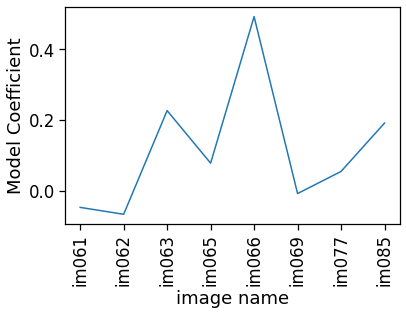

In [181]:
# Because the intercept is just a shift in the data, we can add it back to the
# coefs to recover our origional model
fig,ax = plt.subplots()
ax.plot(funky_model.coef_+funky_model.intercept_)
ax.set_xlabel('image name')
ax.set_ylabel('Model Coefficient')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation = 90);

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now that we know how to use our design matrix, we properly evaluate it using Kfold Cross validation. 

This is done exactly as we did above, with the addition of our new regression parameters.

In [182]:
# First set the seed so you get the same result here no matter what order you run this notebook in!
np.random.seed(5) 

# Initialize KFold object
folderizer = KFold(n_splits=5,shuffle=True)

# Create arrays to save the results
self_score = np.empty(n_folds)
cross_score = np.empty(n_folds)
models = [None]*5

# Loop over folds, fit the model and collect the scores
for ii, (train_index,test_index) in enumerate(folderizer.split(X,y)):
    models[ii] = LinearRegression(fit_intercept=False).fit(X[train_index,:], y[train_index])
    self_score[ii] = models[ii].score(X[train_index,:], y[train_index])
    cross_score[ii] = models[ii].score(X[test_index,:], y[test_index])
print(f'Training Score: {self_score}')
print(f'Testing Score: {cross_score}')
print(f'Average Testing Score: {np.mean(cross_score)}')


Training Score: [0.26540136 0.23421573 0.2485213  0.21699952 0.25389617]
Testing Score: [0.04146961 0.25363125 0.18489542 0.33999858 0.20680467]
Average Testing Score: 0.20535990695746795


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Loop through the folds, as we did above, but now plot the coefficients for each fold to check how consistent the results are

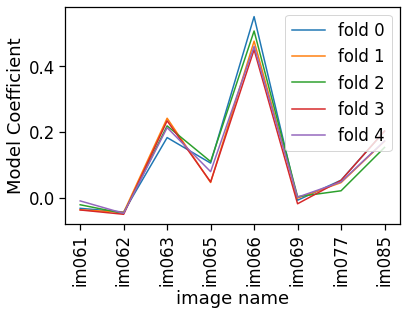

In [161]:

# Create a plot axis to visualize the results
fig,ax = plt.subplots()

# Loop over folds and plot the coefficients
for ii, (train_index, test_index) in enumerate(folderizer.split(X, y)):
    ax.plot(models[ii].coef_, label = f'fold {ii}')
# Label the axes
ax.set_xlabel('image name')
ax.set_ylabel('Model Coefficient')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation = 90);
ax.legend()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> How do stimulus and behavior information compare? </h3>
    
By fitting models with different combinations of features, we can get a richer sense of how different features are encoded by neural activity. 

One option for doing this is simply to fit a model to each variable of interest and compare their performance. This answers a very simple question: how much of a cells variability can be explained by this particular feature. We will see, however, that when variables are correlated the outcome of such one-at-a-time model fits can be difficult to interpret. 


This next step is going to involve a bunch of model fitting, using the same basic procedure we outlined in the previous section. Before we go on, lets take a quick momement to move our KFold Linear Model fitting into a function so we don't have to type so much!

Note that the `KFold` object includes both `shuffle` and `shuffle_seed` parameters. `shuffle` does exactly what it sounds like- it randomizes the set data points included in each fold. `shuffle_seed` can be used to get reproducible results from this shuffling. This is particularly important if we want to compare models- using the same shuffle seed will give the same random set of trials across function calls.

In [162]:
def crossValidateLinearModel(X, y , n_split = 5, shuffle = False, shuffle_seed = None):
    '''
    Cross validate a linear model using KFold cross validation

    Parameters
    ----------
    X : np.array
        The input data to fit
    y : np.array
        The output data to fit
    n_split : int
        The number of splits to use
    shuffle : bool
        Whether or not to shuffle the data
    shuffle_seed : int
        The seed to use for shuffling the data

    Returns
    -------
    Mean Score: float
        The average cross validation score
    Model List: list    
        The models fit to each fold of the data
    Test score: np.array    
        The cross validation scores for testing data each fold
    Train score: np.array
        The cross validation scores for testing data each fold
    '''

    if len(X.shape)==1:
        X = X.copy().reshape(-1,1)
    # Initialize KFold object
    folderizer = KFold(n_splits=n_split,shuffle=shuffle,random_state=shuffle_seed)
    # Create an array to save the results
    self_score = np.empty(n_folds)
    cross_score = np.empty(n_folds)
    models = [None]*n_split
    # Loop through the folds, fit the model, and save the results
    for ii, (train_index, test_index) in enumerate(folderizer.split(X,y)):
        models[ii] = LinearRegression(fit_intercept=False).fit(X[train_index,:], y[train_index])
        self_score[ii] = models[ii].score(X[train_index,:], y[train_index])
        cross_score[ii] = models[ii].score(X[test_index,:], y[test_index])
        
    return np.mean(cross_score),models,cross_score,self_score

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Create an X matrix for each variable we want to test: stimulus, pupil, and running. 

Use the `mean_pupil_width`, `mean_running_speed` and `mean_response` columns of the `stimulus_response_df` for our cell. 

Remember that we previously we saved this data as `cell_df` above.

Print out the shapes of each X matrix. 

Plot the X matrices for tunning and pupil to see what they look like. 

In [163]:
# Create design matrix for each feature
X_stim = X.copy()
X_pupil = cell_df.mean_pupil_width.values
X_running = cell_df.mean_running_speed.values

In [164]:
# What are their shapes?
print('X_stim:', X_stim.shape)
print('X_pupil:', X_pupil.shape)
print('X_running:', X_running.shape)

X_stim: (312, 8)
X_pupil: (312,)
X_running: (312,)


Text(0, 0.5, 'running speed (cm/s)')

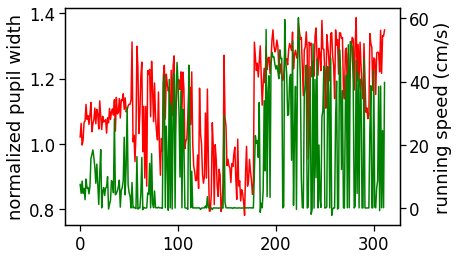

In [165]:
# Plot the running and pupil design matrices as traces to see what they look like
# Bonus if you use a twinx() to see both on the same axis
fig, ax = plt.subplots()
ax.plot(X_pupil, color='r', label='pupil_width')
ax.set_ylabel('normalized pupil width')
ax2 = ax.twinx()
ax2.plot(X_running, color='g', label='running_speed')
ax2.set_ylabel('running speed (cm/s)')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the function we created above to cross-validate and test our linear model for each of the variables. 

Which one produces the highest score? 

In [166]:
# Now use our fancy new function to test a bunch of models.
seed = 5
x_stim_score,_,_,_  = crossValidateLinearModel(X_stim, y, shuffle = True, shuffle_seed=seed)
print(f'Stimulus model score {x_stim_score}')

x_pupil_score,_,_,_  = crossValidateLinearModel(X_pupil, y, shuffle = True, shuffle_seed=seed)
print(f'Pupil model score {x_pupil_score}')

x_running_score,_,_,_  = crossValidateLinearModel(X_running, y, shuffle = True, shuffle_seed=seed)
print(f'Running model score {x_running_score}')

Stimulus model score 0.20535990695746795
Pupil model score 0.014245255500929189
Running model score 0.03867683092425471


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h4> What if our variables are correlated? </h4>

At face value it looks like our cell of choice heavily encodes stimulus identify, with weaker encoding of running and pupil size.

So...can we go to an early lunch? Not quite. The challence here is that running and pupil diameter are not necessarily indpendent variables. This makes that fact that our neuron shows a weak correlation with both of them difficult to interpret.

Let's plot the relationship of running and pupil

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now, lets return to the relationship between <b>pupil width</b> and <b>running</b> , using our design matrices which contain the average value of these variables for each stimulus presentation. 

Compute the <b>pearson correlation</b>  and put it in the title of the plot. Is the relationship significant?

1.2433533297618815e-36


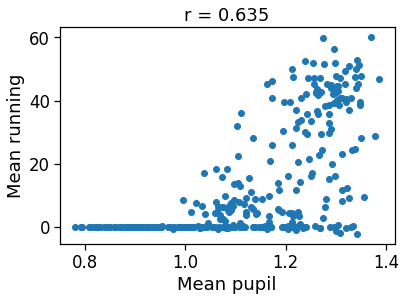

In [167]:
# Plot pupil vs running. Label your axes.
fig, ax = plt.subplots()
ax.scatter(X_pupil, X_running)
ax.set_xlabel('Mean pupil')
ax.set_ylabel('Mean running')

# Compute the correlation and print it out
r, p = pearsonr(X_pupil, X_running)
ax.set_title('r = '+str(np.round(r, 3)))
print(p)

How can we know if our model is pupil or running are actually imporving our model, or if its one only works because of this correlation? We will tackle this next.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Question 4: Does the prediction improve when additional variables are included? </h3>

In regression models, we are not limited to considering each feature one-at-a time. Instead, multiple features or sets of features can be combined into a single model simply by combining them in the design matrix used to train that model.

This is particularly useful when trying to determine if correlated features are uniquely encoded by a cell. To close today, we will see two methods for asking whether or not a given feature explains some of cell's variance beyond what could have been explained by our other modeled features. 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Multiple linear regression </h3>

*Multiple Linear Regression* gives us tools to dissect the contributions of different features in explaining variance.

Just as we built a design matrix out of different stimulus identities, we can similary construct one that includes additional features about our data.

Let's create an X matrix that incorporates stimulus, pupil, and running

In [168]:
# Stack up the x matrices to make one big feature matrix
X_combo = np.hstack((X_stim, X_pupil.reshape(-1,1), X_running.reshape(-1,1)))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use our `crossValidateLinearModel` function from before to get the model prediction for this multi-variate X matrix.

In [169]:
# Provide X_combo and y to the function
x_combo_score,_,_,_  = crossValidateLinearModel(X_combo, y, shuffle = True, shuffle_seed=seed)
print(f'Combined model score {x_combo_score}')

Combined model score 0.2753154846221241


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Importantly, we cannot simply look at the model coefficients, as we did in the "stimulus only" example. This is because our model now contains different types of features with different magnitudes, and there is not a clear mapping between them. While the weights we fit will scale accordingly, they can no longer be directly compared. Visualizing the design matrix illustrates this problem.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Plot the design matrix `X_combo` for the first 20 stimulus presentations.

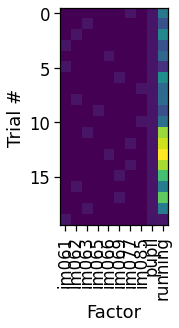

In [170]:
fig,ax = plt.subplots()

# For labeling our plot
xlabels = img_names.copy()
xlabels = np.append(xlabels,'pupil')
xlabels = np.append(xlabels,'running')

ax.imshow(X_combo[:20]) 
ax.set_ylabel('Trial #')
ax.set_xlabel('Factor')

ax.set_xticks(np.arange(0,len(xlabels)))
ax.set_xticklabels(xlabels,rotation = 90);


This shows images 1-8, then running speed for each trial, then pupil width for each trial

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

It is worth noting that `Scikit-Learn` has a tool called the `StandardScaler` that will normalize model inputs. This is useful if you want or need to more explicity compare coefficient weights across variables of different types, but we won't worry about that for now. You can read more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Leave one out test </h4>

Instead, we can use the model scores - that is, the variance in our data explained by our model - to test the encoding of any particular feature.

Specifically, we can systematically drop out feature one at a time and see how model performance changes. If the model gets worse, it suggests that this feature was explaining some of the variance in our data. Because other features are still included, this method is a way to avoid mistakenly assuming that a cell encodes all of a set of correlated variables.

Let's create several design matrices, each with one of the variables left out

In [171]:
# Create each design matrix as a stacked combo of all the features except the one we are leaving out
X_wout_stimulus = np.hstack((X_pupil.reshape(-1,1), X_running.reshape(-1,1)))
X_wout_running =  np.hstack((X_stim, X_pupil.reshape(-1,1)))
X_wout_pupil =  np.hstack((X_stim, X_running.reshape(-1,1)))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Use the `crossValidateLinearModel` function again to test model performance on each of the leave one out design matrices.

In [172]:
# Now use our fancy new function to test a bunch of models.
x_combo_score,_,_,_  = crossValidateLinearModel(X_combo, y, shuffle = True, shuffle_seed=seed)
print(f'Combo {x_combo_score}')

x_wout_stim_score,_,_,_  = crossValidateLinearModel(X_wout_stimulus, y, shuffle = True, shuffle_seed=seed)
print(f'Wout Stim {x_wout_stim_score}')
print(f'Additional variance explained by stim {x_combo_score-x_wout_stim_score}')

x_wout_pupil_score,_,_,_  = crossValidateLinearModel(X_wout_pupil, y, shuffle = True, shuffle_seed=seed)
print(f'Wout Pupil {x_wout_pupil_score}')
print(f'Additional variance explained by pupil {x_combo_score-x_wout_pupil_score}')

x_wout_running_score,_,_,_  = crossValidateLinearModel(X_wout_running, y, shuffle = True, shuffle_seed=seed)
print(f'Wout Running {x_wout_running_score}')
print(f'Additional variance explained by running {x_combo_score-x_wout_running_score}');


Combo 0.2753154846221241
Wout Stim 0.053251295929841146
Additional variance explained by stim 0.22206418869228292
Wout Pupil 0.2788477382277962
Additional variance explained by pupil -0.0035322536056721088
Wout Running 0.24919554692993132
Additional variance explained by running 0.026119937692192757


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

<h4> Impact of behavioral choice on model prediction </h4>

In part 2 above, we also suggested that cells encoded the difference between 'hit' and 'miss' trials (image changes with or without a lick). 

Build a complete model that includes these features using the same one-hot encoding method we used for the stimulus, then use this to quanitfy the relative contribution of stimulus identity vs. choice

In [173]:
# Get values from the stimulus response df for our cell
X_hit = cell_df.hit.values
X_lick = cell_df.licked.values

In [174]:
# Construct the full model
X_full = np.hstack((X_stim, X_pupil.reshape(-1,1), X_running.reshape(-1,1), X_hit.reshape(-1,1), X_lick.reshape(-1,1)))

# And subset models lacking each variable
X_wout_hit = np.hstack((X_stim, X_pupil.reshape(-1,1), X_running.reshape(-1,1), X_lick.reshape(-1,1)))
X_wout_lick = np.hstack((X_stim, X_pupil.reshape(-1,1), X_running.reshape(-1,1), X_hit.reshape(-1,1)))

In [175]:
# Evaluate
x_full_score,_,_,_  = crossValidateLinearModel(X_full, y, shuffle = True,shuffle_seed=seed)
print(f'Combo {x_full_score}')

x_wout_hit_score,_,_,_  = crossValidateLinearModel(X_wout_hit, y, shuffle = True,shuffle_seed=seed)
print(f'Wout hits {x_wout_hit_score}')
print(f'Additional variance explained by hit-vs-miss {x_full_score-x_wout_hit_score}')

x_wout_lick_score,_,_,_  = crossValidateLinearModel(X_wout_lick, y, shuffle = True, shuffle_seed=seed)
print(f'Wout licks {x_wout_lick_score}')
print(f'Additional variance explained by licking {x_full_score-x_wout_lick_score}')

Combo 0.2681936812068336
Wout hits 0.27270783524963943
Additional variance explained by hit-vs-miss -0.004514154042805807
Wout licks 0.28162875798780007
Additional variance explained by licking -0.013435076780966448


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

This result may be surprising, given that previously we showed that tunning can be different on hits vs misses.

To understand why this is happening, we need to think about what question we are asking with our model. In the previous problem, we used a single feature to encode whether a trial was a hit or a miss. This allows for changes in overall response on hit vs miss trials, but cannot account more subtle difference in tuning.

There are a couple ways to answer this question. One would be to adapt the linear modeling framework to handle two conditions of stimuli: hits vs misses

In [176]:
# Find which trials are hits and misses
is_hit = X_hit.astype(bool)

# Build two copies of the stimulus matrix: one for hits and one for misses
# When a trial is not in that category, set all values to 0.
X_hit_stim = X_stim.copy()
X_hit_stim[~is_hit,:] = 0
X_miss_stim = X_stim.copy()
X_miss_stim[is_hit,:] = 0

# Combine everything into a single design matrix.
X_seperate_stim = np.hstack((X_hit_stim, X_miss_stim))

This particular question reqires a little bit of special handling. To see why, lets look at the profile of hit vs. miss trials:

Text(0.5, 0, 'Trial #')

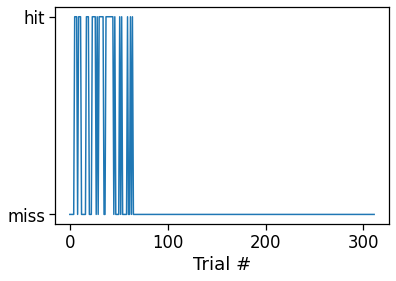

In [177]:
# plot X_hit over time to see how many trials are hits vs misses

fig,ax = plt.subplots()
ax.plot(X_hit.astype(int))
ax.set_yticks([0,1])
ax.set_yticklabels(['miss','hit'])
ax.set_xlabel('Trial #')

You will notice that there are *way* more miss trials, and that they are not evenly distributed through the session. If we were to just grab trials without paying attention to this, we could undersampling the hits and as a result overfitting our model. 

Fortunatly, `sklearn` includes a 'stratification' setting on its data splitters. Here, stratification just means that it will try to get equal sampling from input each specified catigory durring a spilt. The  `train_test_split` function has a 'stratify' input.


In [190]:
# Split miss trials
y_train, y_test, X_seperate_train, X_seperate_test = \
    train_test_split(y, X_seperate_stim, test_size=.5, train_size=.5, stratify=is_hit)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now Train a model

In [203]:
# Use the LinearRegression object with X_separate_stim matrix and the y value (cell responses) to predict
lr = LinearRegression(fit_intercept=False).fit(X_seperate_train, y_train)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

Now when we will, effectively, get two sets of coefficient: one for hit trials and one for miss trials. They will be combined into a single coefficient vector. 

Plot each set of coefficients; Do you notice any differences?  Hint: we did this earlier without a model fit

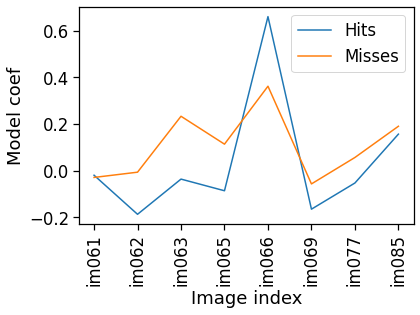

In [204]:
# Plot the coefficients for the hits and misses separately
fig,ax = plt.subplots()
ax.plot(lr.coef_[:8],label= 'Hits')
ax.plot(lr.coef_[8:],label = 'Misses')
ax.set_xlabel('Image index')
ax.set_ylabel('Model coef')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(img_names,rotation=90)
ax.legend();

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>
Finally, lets evaluate our model on both our training and held out data. Recall that before, adding a 'hit' variable basically did nothing for our ability to predict new data. 
    
What do this difference between these methods tell us about encoding in our example cell?

In [199]:
lr.score(X_seperate_test, y_test)

0.2588166246385367

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Conclusion </h3>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> 
Regression is a powerful way to quantitativly probe the relationships between variables. In this tutorial, we have seen how it can be used to understand what and how various stimuli and behavioral features are encoded by single neurons.

<p>  
In the interest of time, we will end by admitting we the most certainly haven't shown you everything that you can do with regression. We will close this tutorial quickly highlighting a few other useful regression applications that you might find yourself wanting later in the course (or beyond!).

<p> 
  <b>  (1) Regression is a great way to survey a large amount of data.</b>  
    <p>
        As datasets get biger and easier to collect, we need tools that allow us to probe many cells or variables in an efficient manor. Regression models offer a way to screen large amounts of data. You might, for example, fit a regression model to every cell in the Visual Behavior dataset to ask "which cell types are most modulated by running speed." 
<p>
In the next tutorial, we will learn about a related set of tools called "Decoding Models." These models allow you understand what is encoded in a neural population by explicity decoding that information from a recoding. These techniques are often used in tandem - you might, say, decode running from an entire population of neurons, then use regression models to look at how individual cells suport your decoding analysis.
    
<p>   
<b> (2) Regression models are predictive </b>
<p>
Here, we focused entirly on cases where we were predicting similar but held out data with our model. Often, however, we use regression to look at differences between condition by fitting a model on one condition and predicting on the other. This is very related to what we did with hits and misses: by seperating the design matrix there, we effectivly trained one model on 'hits' and another on 'misses.' An alternative way of doing this analysis would have been to see how well (or badly) the hit model did at predicting miss trials or visa-vera.
    
<p>
<b> (3) Linear models are the simplist,  but there is no rule that regression needs to be linear</b>
<p>  
Everything we have done here is commonly refered to as a "General Linear Model," or gLM. These are super useful, but this model class makes a big assumption about the variance distribution of our data: specifically, we assumed that variance is normally distributed about some mean value, $f(x)$. This is mathmatically the easiest thing to do, but it turns out to not always be the best assumption.

    
<p> 
In fact, there is a very specific case that often arrises in neuroscience where we know this assumption to be particularly bad: Spike trains. Spikes are discrete, transient events. Over a given time interval, there can never be fewer than 0 spikes, and there can never be a fractional number of spikes. If we assume that spikes are occure indepently with an average rate (call it $\lambda$), then a poisson distribution (https://en.wikipedia.org/wiki/Poisson_distribution) can be shown to be a good model of this variance. We can make a regression model that assumes poisson variance if we fit the following:
    
<p>
$ln(\lambda) = \beta X$ or equivalently $\lambda = e^{\beta X}$
    
<p>
Here, adding the $ln(*)$ term makes the model harder to fit, but fortunatly, `sklearn` ships with an implementation of poisson regression. It can also handle other commonly used non-linearities (called link functions) (e.g. those for exponential data, logistic data, etc. https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models). 

    
<p>
Because this class of models is a generalization of the general linear model, they are commonly called "General*ized* Linear Models," or GLMs. Yes, this nomenclature is confusing- if it makes you feel any better, the people who created it later admitted they should have chosen a better name. You will sometimes also hear of these models refered to as "Linear-Non-linear" models, because the linear and nonlinear parts can be mathematically seperated.

<p>
All of the tools we have discussed for linear regression can be applied to GLMs. More information on this method is avalible in the Data Book!
